In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits

import astropy
import scipy
from astropy.coordinates import SkyCoord
from astropy import units as u

In [3]:
hdul = fits.open('GalDisc_4xmmdr14_filtered_flag0.fits')
data = hdul[1].data

#Coordinates
xmmDR14_id = data['SrcID']
xmmDR14_detid = data['DetID']
xmmDR14_l = data['LII']
xmmDR14_b = data['BII']
xmmDR14_ra = data['RA']
xmmDR14_dec = data['Dec']
xmmDR14_poserr = data['POSERR']
xmmDR14_nn = data['Dist_NN']
xmmDR14_l = np.where(xmmDR14_l < 180, xmmDR14_l, xmmDR14_l-360)

#detection max likelihood
xmmDR14_detml = data['EP_8_DET_ML']
xmmDR14_PNdetml4 = data['PN_4_DET_ML']
xmmDR14_PNdetml5 = data['PN_5_DET_ML']
xmmDR14_M1detml4 = data['M1_4_DET_ML']
xmmDR14_M1detml5 = data['M1_5_DET_ML']
xmmDR14_M2detml4 = data['M2_4_DET_ML']
xmmDR14_M2detml5 = data['M2_5_DET_ML']

#flux
xmmDR14_fxhalfto1 = data['EP_2_Flux']
xmmDR14_fx1to2 = data['EP_3_Flux']
xmmDR14_fx2to4 = data['EP_4_Flux']
xmmDR14_fx4to12 = data['EP_5_Flux']
xmmDR14_fxhalfto1err = data['EP_2_Flux_Err']
xmmDR14_fx1to2err = data['EP_3_Flux_Err']
xmmDR14_fx2to4err = data['EP_4_Flux_Err']
xmmDR14_fx4to12err = data['EP_5_Flux_Err']

#count rates
xmmDR14_PNrthalfto1 = data['PN_2_Rate']
xmmDR14_PNrt1to2 = data['PN_3_Rate']
xmmDR14_PNrt2to4 = data['PN_4_Rate']
xmmDR14_PNrt4to12 = data['PN_5_Rate']
xmmDR14_PNrthalfto1err = data['PN_2_Rate_Err']
xmmDR14_PNrt1to2err = data['PN_3_Rate_Err']
xmmDR14_PNrt2to4err = data['PN_4_Rate_Err']
xmmDR14_PNrt4to12err = data['PN_5_Rate_Err']
xmmDR14_M1rthalfto1 = data['M1_2_Rate']
xmmDR14_M1rt1to2 = data['M1_3_Rate']
xmmDR14_M1rt2to4 = data['M1_4_Rate']
xmmDR14_M1rt4to12 = data['M1_5_Rate']
xmmDR14_M1rthalfto1err = data['M1_2_Rate_Err']
xmmDR14_M1rt1to2err = data['M1_3_Rate_Err']
xmmDR14_M1rt2to4err = data['M1_4_Rate_Err']
xmmDR14_M1rt4to12err = data['M1_5_Rate_Err']
xmmDR14_M2rthalfto1 = data['M2_2_Rate']
xmmDR14_M2rt1to2 = data['M2_3_Rate']
xmmDR14_M2rt2to4 = data['M2_4_Rate']
xmmDR14_M2rt4to12 = data['M2_5_Rate']
xmmDR14_M2rthalfto1err = data['M2_2_Rate_Err']
xmmDR14_M2rt1to2err = data['M2_3_Rate_Err']
xmmDR14_M2rt2to4err = data['M2_4_Rate_Err']
xmmDR14_M2rt4to12err = data['M2_5_Rate_Err']

#exposure maps
xmmDR14_PNexphalfto1 = data['PN_2_Exp']
xmmDR14_PNexp1to2 = data['PN_3_Exp']
xmmDR14_PNexp2to4 = data['PN_4_Exp']
xmmDR14_PNexp4to12 = data['PN_5_Exp']
xmmDR14_M1exphalfto1 = data['M1_2_Exp']
xmmDR14_M1exp1to2 = data['M1_3_Exp']
xmmDR14_M1exp2to4 = data['M1_4_Exp']
xmmDR14_M1exp4to12 = data['M1_5_Exp']
xmmDR14_M2exphalfto1 = data['M2_2_Exp']
xmmDR14_M2exp1to2 = data['M2_3_Exp']
xmmDR14_M2exp2to4 = data['M2_4_Exp']
xmmDR14_M2exp4to12 = data['M2_5_Exp']
xmmDR14_EPexp4to12 = np.nansum(np.stack((xmmDR14_PNexp4to12,xmmDR14_M1exp4to12,xmmDR14_M2exp4to12)), axis=0)
xmmDR14_EPexp2to4 = np.nansum(np.stack((xmmDR14_PNexp2to4,xmmDR14_M1exp2to4,xmmDR14_M2exp2to4)), axis=0)
xmmDR14_EPexp1to2 = np.nansum(np.stack((xmmDR14_PNexp1to2,xmmDR14_M1exp1to2,xmmDR14_M2exp1to2)), axis=0)

#flags
xmmDR14_flag = data['Sum_Flag']
xmmDR14_ext = data['EP_Extent']
xmmDR14_conf = data['Confused']
xmmDR14_PNfl = data['PN_Flag']
xmmDR14_M1fl = data['M1_Flag']
xmmDR14_M2fl = data['M2_Flag']
xmmDR14_EPfl = data['EP_Flag']
xmmDR14_PNpu = data['PN_Pileup']
xmmDR14_M1pu = data['M1_Pileup']
xmmDR14_M2pu = data['M2_Pileup']

#supplementary data
xmmDR14_lc = data['Tseries']
xmmDR14_spec = data['Spectra']
spectra_true = np.where(data['Spectra'])[0]  
spectra_false = np.where(data['Spectra']==False)[0]

#multiple detections
xmmDR14_var = data['Var_Flag']
xmmDR14_ndet = data['N_DETECTIONS']
xmmDR14_sra = data['SC_RA']
xmmDR14_sdec = data['SC_Dec']
xmmDR14_sposerr = data['SC_POSERR']
xmmDR14_sdetml = data['SC_Det_ML']
xmmDR14_sfxhalfto1 = data['SC_EP_2_FLUX']
xmmDR14_sfx1to2 = data['SC_EP_3_FLUX']
xmmDR14_sfx2to4 = data['SC_EP_4_FLUX']
xmmDR14_sfx4to12 = data['SC_EP_5_FLUX']
xmmDR14_sfxhalfto1err = data['SC_EP_2_FLUX_ERR']
xmmDR14_sfx1to2err = data['SC_EP_3_FLUX_ERR']
xmmDR14_sfx2to4err = data['SC_EP_4_FLUX_ERR']
xmmDR14_sfx4to12err = data['SC_EP_5_FLUX_ERR']

#counts
xmmDR14_PNctshalfto1 = xmmDR14_PNrthalfto1*xmmDR14_PNexphalfto1
xmmDR14_PNcts1to2 = xmmDR14_PNrt1to2*xmmDR14_PNexp1to2
xmmDR14_PNcts2to4 = xmmDR14_PNrt2to4*xmmDR14_PNexp2to4
xmmDR14_PNcts4to12 = xmmDR14_PNrt4to12*xmmDR14_PNexp4to12
xmmDR14_M1ctshalfto1 = xmmDR14_M1rthalfto1*xmmDR14_M1exphalfto1
xmmDR14_M1cts1to2 = xmmDR14_M1rt1to2*xmmDR14_M1exp1to2
xmmDR14_M1cts2to4 = xmmDR14_M1rt2to4*xmmDR14_M1exp2to4
xmmDR14_M1cts4to12 = xmmDR14_M1rt4to12*xmmDR14_M1exp4to12
xmmDR14_M2ctshalfto1 = xmmDR14_M2rthalfto1*xmmDR14_M2exphalfto1
xmmDR14_M2cts1to2 = xmmDR14_M2rt1to2*xmmDR14_M2exp1to2
xmmDR14_M2cts2to4 = xmmDR14_M2rt2to4*xmmDR14_M2exp2to4
xmmDR14_M2cts4to12 = xmmDR14_M2rt4to12*xmmDR14_M2exp4to12
xmmDR14_EPcts1to2 = np.nansum(np.stack((xmmDR14_PNcts4to12,xmmDR14_M1cts4to12,xmmDR14_M2cts4to12)), axis=0)
xmmDR14_EPcts2to4 = np.nansum(np.stack((xmmDR14_PNcts2to4,xmmDR14_M1cts2to4,xmmDR14_M2cts2to4)), axis=0)
xmmDR14_EPcts4to12 = np.nansum(np.stack((xmmDR14_PNcts1to2,xmmDR14_M1cts1to2,xmmDR14_M2cts1to2)), axis=0)

#chi squared
xmmDR14_PNchi2prob = data['PN_Chi2prob']
xmmDR14_M1chi2prob = data['M1_Chi2prob']
xmmDR14_M2chi2prob = data['M2_Chi2prob']

#8 cts
xmmDR14_8cts = data['EP_8_Cts']
xmmDR14_PN8cts = data['PN_8_Cts']
xmmDR14_M18cts = data['M1_8_Cts']
xmmDR14_M28cts = data['M2_8_Cts']
hdul.close()

xmmDR14_EPhr4 = data['EP_HR4']
xmmDR14_EPhr3 = data['EP_HR3']
xmmDR14_EPhr2 = data['EP_HR2']
xmmDR14_PNhr4 = data['PN_HR4']
xmmDR14_M1hr4 = data['M1_HR4']
xmmDR14_M2hr4 = data['M2_HR4']

In [4]:
#add up EPIC PN/MOS1/MOS2 count rates
xmmDR14_EPrt2to4 = np.nansum(np.stack((xmmDR14_PNrt2to4,xmmDR14_M1rt2to4,xmmDR14_M2rt2to4)), axis=0)
xmmDR14_EPrt4to12 = np.nansum(np.stack((xmmDR14_PNrt4to12,xmmDR14_M1rt4to12,xmmDR14_M2rt4to12)), axis=0)
xmmDR14_EPrt2to12 = np.nansum(np.stack((xmmDR14_EPrt2to4,xmmDR14_EPrt4to12)), axis=0)

#add errors in quadrature
xmmDR14_EPrt2to4_err = np.sqrt(np.nansum(np.stack((xmmDR14_PNrt2to4err**2,xmmDR14_M1rt2to4err**2,xmmDR14_M2rt2to4err**2)), axis=0))
xmmDR14_EPrt4to12_err = np.sqrt(np.nansum(np.stack((xmmDR14_PNrt4to12err**2,xmmDR14_M1rt4to12err**2,xmmDR14_M2rt4to12err**2)), axis=0))
xmmDR14_EPcts2to4_err = np.sqrt(np.nansum(np.stack(((xmmDR14_PNrt2to4err*xmmDR14_PNexp2to4)**2,(xmmDR14_M1rt2to4err*xmmDR14_M1exp2to4)**2,(xmmDR14_M2rt2to4err*xmmDR14_M2exp2to4)**2)), axis=0))
xmmDR14_EPcts4to12_err = np.sqrt(np.nansum(np.stack(((xmmDR14_PNrt4to12err*xmmDR14_PNexp4to12)**2,(xmmDR14_M1rt4to12err*xmmDR14_M1exp4to12)**2,(xmmDR14_M2rt4to12err*xmmDR14_M2exp4to12)**2)), axis=0))

In [5]:
#Sgr A*
sgra_ra, sgra_dec = 266.41683708333335, -29.007810555555555
sgrrad = np.sqrt((sgra_ra-xmmDR14_ra)**2 + (sgra_dec-xmmDR14_dec)**2) #approximate distance to Sgr A*

In [6]:
#calculate APPROXIMATE distance (accurate for small distances)
def dist(ra1, dec1, ra2, dec2):
    return(np.sqrt((ra2-ra1)**2 + (dec2-dec1)**2))

In [7]:
#Stray light sources
#GX 3+1
gxra, gxdec = 266.983330, -26.563610
# second stray light source: 354.28, -0.17
sl2ra, sl2dec = 262.9945537, -33.8641678
sl3ra, sl3dec = 270.25, -25.05 #estimated

In [8]:
def hr(h, s):
    return((h-s)/(h+s))

#hardness ratio: (4to12 - 2to4)/(4to12 + 2to4) [similar to HR2, except 4to12 vs 4to8]
PNhr2 = hr(xmmDR14_PNrt4to12, xmmDR14_PNrt2to4)
M1hr2 = hr(xmmDR14_M1rt4to12, xmmDR14_M1rt2to4)
M2hr2 = hr(xmmDR14_M2rt4to12, xmmDR14_M2rt2to4)
print(PNhr2[10000])
#combined EPIC HR
EPhr2_avg = np.nanmean(np.vstack((PNhr2, M1hr2, M2hr2)), axis=0)
EPhr2 = hr(np.nansum(np.stack((xmmDR14_PNrt4to12,xmmDR14_M1rt4to12,xmmDR14_M2rt4to12)), axis=0), 
          np.nansum(np.stack((xmmDR14_PNrt2to4,xmmDR14_M1rt2to4,xmmDR14_M2rt2to4)), axis=0))
#EPhr2 = hr(xmmDR14_PNrt4to12+xmmDR14_M1rt4to12+xmmDR14_M2rt4to12, xmmDR14_PNrt2to4+xmmDR14_M1rt2to4+xmmDR14_M2rt2to4)

#hardness ratio: (2to12 - 0.5to2)/(2to12 + 0.5to2) 
PNhr1 = hr(xmmDR14_PNrt4to12+xmmDR14_PNrt2to4,xmmDR14_PNrthalfto1+xmmDR14_PNrt1to2)
M1hr1 = hr(xmmDR14_M1rt4to12+xmmDR14_M1rt2to4,xmmDR14_M1rthalfto1+xmmDR14_M1rt1to2)
M2hr1 = hr(xmmDR14_M2rt4to12+xmmDR14_M2rt2to4,xmmDR14_M2rthalfto1+xmmDR14_M2rt1to2)
#combined EPIC HR
EPhr1 = hr(np.nansum(np.stack((xmmDR14_PNrt4to12,xmmDR14_M1rt4to12,xmmDR14_M2rt4to12,xmmDR14_PNrt2to4,xmmDR14_M1rt2to4,xmmDR14_M2rt2to4)), axis=0), 
          np.nansum(np.stack((xmmDR14_PNrthalfto1+xmmDR14_PNrt1to2+xmmDR14_M1rthalfto1+xmmDR14_M1rt1to2+xmmDR14_M2rthalfto1+xmmDR14_M2rt1to2)), axis=0))
#hr(xmmDR14_PNrt4to12+xmmDR14_PNrt2to4+xmmDR14_M1rt4to12+xmmDR14_M1rt2to4+xmmDR14_M2rt4to12+xmmDR14_M2rt2to4,xmmDR14_PNrthalfto1+xmmDR14_PNrt1to2+xmmDR14_M1rthalfto1+xmmDR14_M1rt1to2+xmmDR14_M2rthalfto1+xmmDR14_M2rt1to2)

#Muno: H is 2.0-3.3keV, L is 0.5-2.0keV; foreground is -1 < hr0 < -0.175.  Here: H is 2-4 keV
PNhr0 = hr(xmmDR14_PNrt2to4,xmmDR14_PNrthalfto1+xmmDR14_PNrt1to2)
M1hr0 = hr(xmmDR14_M1rt2to4,xmmDR14_M1rthalfto1+xmmDR14_M1rt1to2)
M2hr0 = hr(xmmDR14_M2rt2to4,xmmDR14_M2rthalfto1+xmmDR14_M2rt1to2)
#combined EPIC HR
EPhr0 = hr(np.nansum(np.stack((xmmDR14_PNrt2to4,xmmDR14_M1rt2to4,xmmDR14_M2rt2to4)), axis=0), 
          np.nansum(np.stack((xmmDR14_PNrthalfto1+xmmDR14_PNrt1to2+xmmDR14_M1rthalfto1+xmmDR14_M1rt1to2+xmmDR14_M2rthalfto1+xmmDR14_M2rt1to2)), axis=0))
#hr(xmmDR14_PNrt2to4+xmmDR14_M1rt2to4+xmmDR14_M2rt2to4,xmmDR14_PNrthalfto1+xmmDR14_PNrt1to2+xmmDR14_M1rthalfto1+xmmDR14_M1rt1to2+xmmDR14_M2rthalfto1+xmmDR14_M2rt1to2)

def hr_err(h,s, dh, ds):
    hr_0 = hr(h, s)
    hr_h = hr(h+dh, s)
    hr_s = hr(h, s+ds)
    return(np.sqrt((hr_s-hr_0)**2 + (hr_h-hr_0)**2))

#use counts to define uncertainty
#combine EPIC counts
Hstack = np.nansum(np.stack((xmmDR14_PNcts4to12,xmmDR14_M1cts4to12,xmmDR14_M2cts4to12)), axis=0)
Sstack = np.nansum(np.stack((xmmDR14_PNcts2to4,xmmDR14_M1cts2to4,xmmDR14_M2cts2to4)), axis=0)
dHstack = xmmDR14_EPcts4to12_err
dSstack = xmmDR14_EPcts2to4_err
hr2err = hr_err(Hstack, Sstack, dHstack, dSstack)
print(EPhr2)
print(xmmDR14_EPhr4)
print(EPhr2_avg)
print(PNhr2[48070])
print(xmmDR14_PNhr4[48070])
print(M1hr2[48070])
print(xmmDR14_M1hr4[48070])
print(M2hr2[48070])
print(xmmDR14_M2hr4[48070])

0.89336616
[ 0.09021288 -1.          0.25091127 ... -1.          0.3392767
 -0.01086783]
[ 0.1161441  -1.          0.2949933  ... -1.          0.4371917
 -0.01086783]
[ 0.07936066 -1.          0.23596032 ... -1.          0.426075
 -0.01086783]


/var/folders/1_/dsjz4_7912s8m47d3y4nx9jm0000gp/T/ipykernel_68154/612222585.py:2: RuntimeWarning: invalid value encountered in divide
  return((h-s)/(h+s))
/var/folders/1_/dsjz4_7912s8m47d3y4nx9jm0000gp/T/ipykernel_68154/612222585.py:10: RuntimeWarning: Mean of empty slice
  EPhr2_avg = np.nanmean(np.vstack((PNhr2, M1hr2, M2hr2)), axis=0)


IndexError: index 48070 is out of bounds for axis 0 with size 27409

In [ ]:
#initial filter for flagged/extended sources
xmmDR14_flfilt = np.where((xmmDR14_flag == 0) & (xmmDR14_ext == 0) & (xmmDR14_conf == False))[0]

#calculate nearest neighbor
nndist_all = np.zeros(np.size(xmmDR14_ra)) #distance to nearest neighbor in arcsec
for i in range(np.size(xmmDR14_ra)):
    idist = dist(xmmDR14_ra, xmmDR14_dec, xmmDR14_ra[i], xmmDR14_dec[i])
    nndist_all[i] = 3600*idist[np.argsort(idist)[1]]
    
#filter out duplicates:

nndist_min = 6    #min distance [arcsec] for two sources to be considered distinct

duplist = np.zeros(np.size(xmmDR14_ndet))  #check for duplicates & find longest exposure (discard others)
for i in range(np.size(xmmDR14_flfilt)):
    if (xmmDR14_ndet[xmmDR14_flfilt[i]] > 1) and (duplist[xmmDR14_flfilt[i]] == 0):
        ilist = np.where(xmmDR14_id == xmmDR14_id[xmmDR14_flfilt[i]])[0]  #list of all entries with same src id
        jlist = np.where((xmmDR14_flag[ilist] == 0) & (xmmDR14_ext[ilist] == 0) & (xmmDR14_conf[ilist] == False))[0]
        ibest = np.argmax(xmmDR14_EPexp4to12[ilist[jlist]])  #select entry w/ highest exposure map
        #print(ibest)
        duplist[ilist] = 1
        duplist[ilist[jlist[ibest]]] = 10
        
#preliminary filter        
glist_prelim = np.where((xmmDR14_flag == 0) & (xmmDR14_ext == 0) & (xmmDR14_conf == False) & 
                         ((xmmDR14_ndet == 1) | (duplist == 10)))[0]
    
#re-calculate NN for "filtered" sources
nndist_filt = np.zeros(np.size(glist_prelim)) #distance to nearest neighbor in arcsec
for i in range(np.size(glist_prelim)):
    idist = dist(xmmDR14_ra[glist_prelim], xmmDR14_dec[glist_prelim], xmmDR14_ra[glist_prelim][i], xmmDR14_dec[glist_prelim][i])
    nndist_filt[i] = 3600*idist[np.argsort(idist)[1]]

duplist2 = np.zeros(np.size(glist_prelim))
for i in range(np.size(glist_prelim)):
    if nndist_filt[i] < nndist_min:
        ilist2 = np.where(3600*dist(xmmDR14_ra[glist_prelim], xmmDR14_dec[glist_prelim], xmmDR14_ra[glist_prelim][i], xmmDR14_dec[glist_prelim][i]) < nndist_min)[0]  #list of filtered entries with distance < min, including self
        ibest2 = np.argmax(xmmDR14_EPexp4to12[glist_prelim][ilist2])  #select entry w/ highest exposure map
        #print(ibest)
        duplist2[ilist2] = 1
        duplist2[ilist2[ibest2]] = 10
    
#final "clean" source list
x = glist_prelim[np.where((nndist_filt > 6) | (duplist2 == 10))]
   

In [460]:

z_false = x[np.in1d(x,spectra_false)]
fx2to4 = xmmDR14_fx2to4[x]
fx4to12 = xmmDR14_fx4to12[x]
mask = (fx2to4 != 0) | (fx4to12 != 0)
z = x[mask]
y = z[np.in1d(z, spectra_true)]
y_false = z[np.in1d(z, spectra_false)]
print(len(y))
print(len(y_false))
print(len(z))
print(len(mask))

2860
10385
13245
13457


In [461]:
ra = xmmDR14_ra[y]
dec = xmmDR14_dec[y]
print(len(dec))
nndist_filt = np.zeros(np.size(y)) 
nndist_filt5 = np.zeros(np.size(y)) 
nndist_filt10 = np.zeros(np.size(y)) 
for i in range(np.size(y)):
    idist = dist(ra, dec, ra[i], dec[i])
    nndist_filt[i] = 3600*idist[np.argsort(idist)[1]]
    #fifth away
    if 5 < len(idist):
        nndist_filt5[i] = 3600*idist[np.argsort(idist)[5]]
    if 10 < len(idist):
        nndist_filt10[i] = 3600*idist[np.argsort(idist)[10]]

2860


In [462]:
ra_mean = []
dec_mean = []
for outer_key, inner_dict in final_test_2sigdist_it.items():
    for inner_key, sources in inner_dict.items():
        
        if len(sources['sources']) > 1:
            
            ra_list = []
            dec_list = []
            for source in sources['sources']:
                row_index = np.where(id_list == source['src_id'])[0]
                row_index=row_index[0]
                ra_list.append(ra[row_index])
                dec_list.append(dec[row_index])
            ra_mean.append(np.mean(ra_list))
            dec_mean.append(np.mean(dec_list))
        else:
            row_index = np.where(id_list == sources['sources'][0]['src_id'])[0]
            row_index=row_index[0]
            ra_mean.append(ra[row_index])
            dec_mean.append(dec[row_index])
nndist_filt = np.zeros(np.size(ra_mean)) 
nndist_filt5 = np.zeros(np.size(ra_mean)) 
nndist_filt10 = np.zeros(np.size(ra_mean))
print(len(dec_mean))
for i in range(np.size(ra_mean)):
    idist = dist(ra_mean, dec_mean, ra_mean[i], dec_mean[i])
    nndist_filt[i] = 3600*idist[np.argsort(idist)[1]]
    #fifth away
    if 5 < len(idist):
        nndist_filt5[i] = 3600*idist[np.argsort(idist)[5]]
    if 10 < len(idist):
        nndist_filt10[i] = 3600*idist[np.argsort(idist)[10]]      

156


211.14260859394923


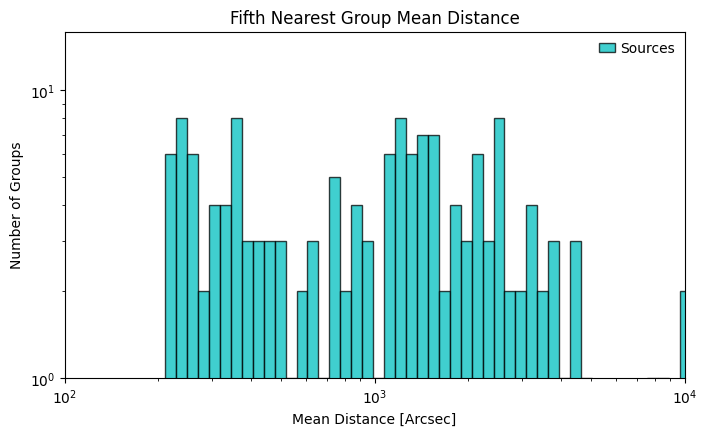

In [463]:
plt.rcParams['xtick.top'] = False
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)
#nbins = np.logspace(np.log10(1e-17),np.log10(6e-12),28)
# Choose number of bins (e.g., sqrt rule)
data_min = np.min(nndist_filt5)
data_max = np.max(nndist_filt5)
print(np.min(nndist_filt5))
n_bins = int(np.ceil(np.sqrt(len(nndist_filt5))))

# Calculate bin width
bin_width = (data_max - data_min) / n_bins

# Create bin edges
bins = np.arange(data_min, data_max + bin_width, bin_width)
nbins = np.logspace(np.log10(data_min),np.log10(data_max),50)

plt.figure(figsize=(8.,4.5))
plt.hist(nndist_filt5, color='c', edgecolor='k', bins=nbins, label='Sources', alpha=0.75)
plt.xlabel('Mean Distance [Arcsec]')
plt.ylabel('Number of Groups')
plt.legend(loc='upper right', labelspacing=0.3, handletextpad=0.35, borderaxespad=0.3, handlelength=1.2, frameon=False, alignment='right')#, markerfirst=False
plt.yscale('log')
plt.xscale('log')
plt.title('Fifth Nearest Group Mean Distance')
plt.xlim(1e2,1e4)
plt.ylim(1,16)

#plt.ylim(None,1.9e3)
plt.tick_params(axis='x', which='both', direction='out')

305.6525521834766


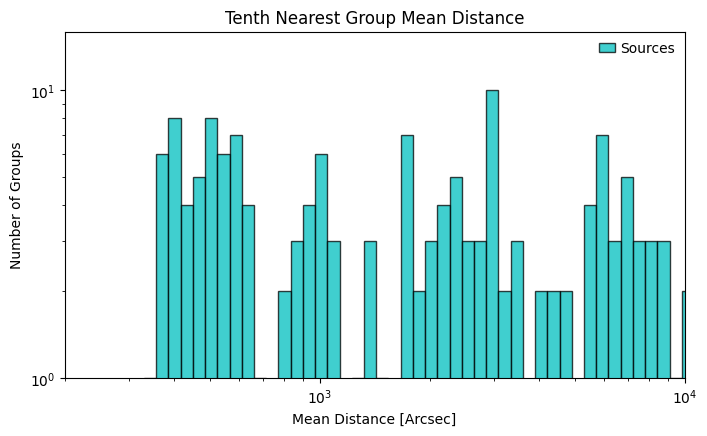

In [464]:
plt.rcParams['xtick.top'] = False
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)
#nbins = np.logspace(np.log10(1e-17),np.log10(6e-12),28)
# Choose number of bins (e.g., sqrt rule)
data_min = np.min(nndist_filt10)
data_max = np.max(nndist_filt10)
print(np.min(nndist_filt10))
n_bins = int(np.ceil(np.sqrt(len(nndist_filt10))))

# Calculate bin width
bin_width = (data_max - data_min) / n_bins

# Create bin edges
bins = np.arange(data_min, data_max + bin_width, bin_width)
nbins = np.logspace(np.log10(data_min),np.log10(data_max),50)

plt.figure(figsize=(8.,4.5))
plt.hist(nndist_filt10, color='c', edgecolor='k', bins=nbins, label='Sources', alpha=0.75)
plt.xlabel('Mean Distance [Arcsec]')
plt.ylabel('Number of Groups')
plt.legend(loc='upper right', labelspacing=0.3, handletextpad=0.35, borderaxespad=0.3, handlelength=1.2, frameon=False, alignment='right')#, markerfirst=False
plt.yscale('log')
plt.xscale('log')
plt.title('Tenth Nearest Group Mean Distance')
plt.xlim(2e2,1e4)
plt.ylim(1,16)


#plt.ylim(None,1.9e3)
plt.tick_params(axis='x', which='both', direction='out')

In [465]:
hdul2 = fits.open('filtered_XMM_DR14.fits')
data2 = hdul2[1].data

In [9]:

PNdetml4 = xmmDR14_PNdetml4[y]
PNdetml5 = xmmDR14_PNdetml5[y]
M1detml4 = xmmDR14_M1detml4[y]
M1detml5 = xmmDR14_M1detml5[y]
M2detml4 = xmmDR14_M2detml4[y]
M2detml5 = xmmDR14_M2detml5[y]
PNchi2prob = xmmDR14_PNchi2prob[y]
M1chi2prob = xmmDR14_M1chi2prob[y]
M2chi2prob = xmmDR14_M2chi2prob[y]
xmm_8cts = xmmDR14_8cts[y]
PN8cts = xmmDR14_PN8cts[y]
M18cts = xmmDR14_M18cts[y]
M28cts = xmmDR14_M28cts[y]

fxhalfto1 = xmmDR14_fxhalfto1[y]
fx1to2 = xmmDR14_fx1to2[y]
fx2to4 = xmmDR14_fx2to4[y]
fx4to12 = xmmDR14_fx4to12[y]
SrcID_filt=xmmDR14_id[y]
DetID_filt=xmmDR14_detid[y]
xmmDR14_obsid=data['OBS_ID']
ObsID_filt=xmmDR14_obsid[y]

In [12]:

fxhalfto12 = []
fx2to12 = []
for i,data in enumerate(y):
    fxhalfto12.append(fxhalfto1[i] + xmmDR14_fx1to2[i] + fx2to4[i] + fx4to12[i])
    fx2to12.append(fx2to4[i] + fx4to12[i])
    if fxhalfto12[i] == 0:
        print(i)
'''
fxhalfto1_f = xmmDR14_fxhalfto1[y_false]
fx1to2_f = xmmDR14_fx1to2[y_false]
fx2to4_f = xmmDR14_fx2to4[y_false]
fx4to12_f = xmmDR14_fx4to12[y_false]
fx2to12_f = []
for j,data in enumerate(y_false):
    fx2to12_f.append(fx2to4_f[j] + fx4to12_f[j])
    if fx2to12_f[j] == 0:
        print(j)
        '''

'\nfxhalfto1_f = xmmDR14_fxhalfto1[y_false]\nfx1to2_f = xmmDR14_fx1to2[y_false]\nfx2to4_f = xmmDR14_fx2to4[y_false]\nfx4to12_f = xmmDR14_fx4to12[y_false]\nfx2to12_f = []\nfor j,data in enumerate(y_false):\n    fx2to12_f.append(fx2to4_f[j] + fx4to12_f[j])\n    if fx2to12_f[j] == 0:\n        print(j)\n        '

In [13]:
EPcts1to2 = xmmDR14_EPcts1to2[y]
EPcts2to4 = xmmDR14_EPcts2to4[y]
EPcts4to12 = xmmDR14_EPcts4to12[y]
EPcts1to2_f = xmmDR14_EPcts1to2[y_false]
EPcts2to4_f = xmmDR14_EPcts2to4[y_false]
EPcts4to12_f = xmmDR14_EPcts4to12[y_false]
EPcts2to12 = []
EPcts2to12_f = []
for i,data in enumerate(y):
    EPcts2to12.append(EPcts2to4[i] + EPcts4to12[i])
    if EPcts2to12[i] == 0:
        print(i)
for j, data in enumerate(y_false):
    EPcts2to12_f.append(EPcts2to4_f[j] + EPcts4to12_f[j])
    if EPcts2to12_f[j] == 0:
        print(j)
flux_list = []
cts_list = []
flux_list_f = []
cts_list_f = []
for k,data in enumerate(y):
    flux_list.append(fx2to12[k])
    cts_list.append(EPcts2to12[k])
for l,data in enumerate(y_false):
    flux_list_f.append(fx2to12_f[l])
    cts_list_f.append(EPcts2to12_f[l])

NameError: name 'y_false' is not defined

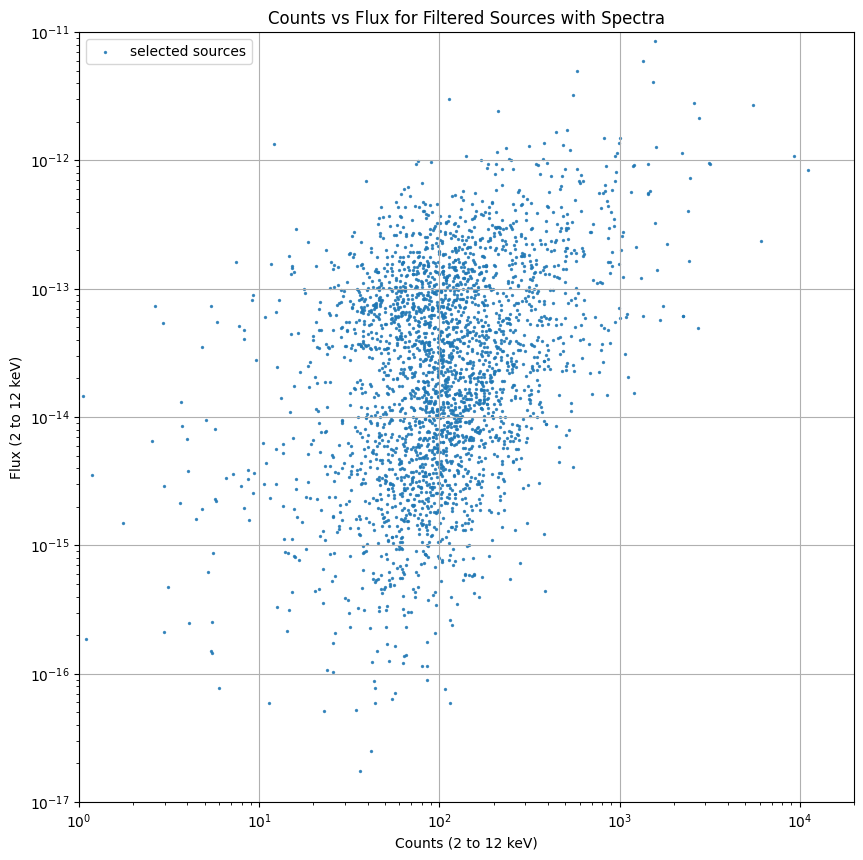

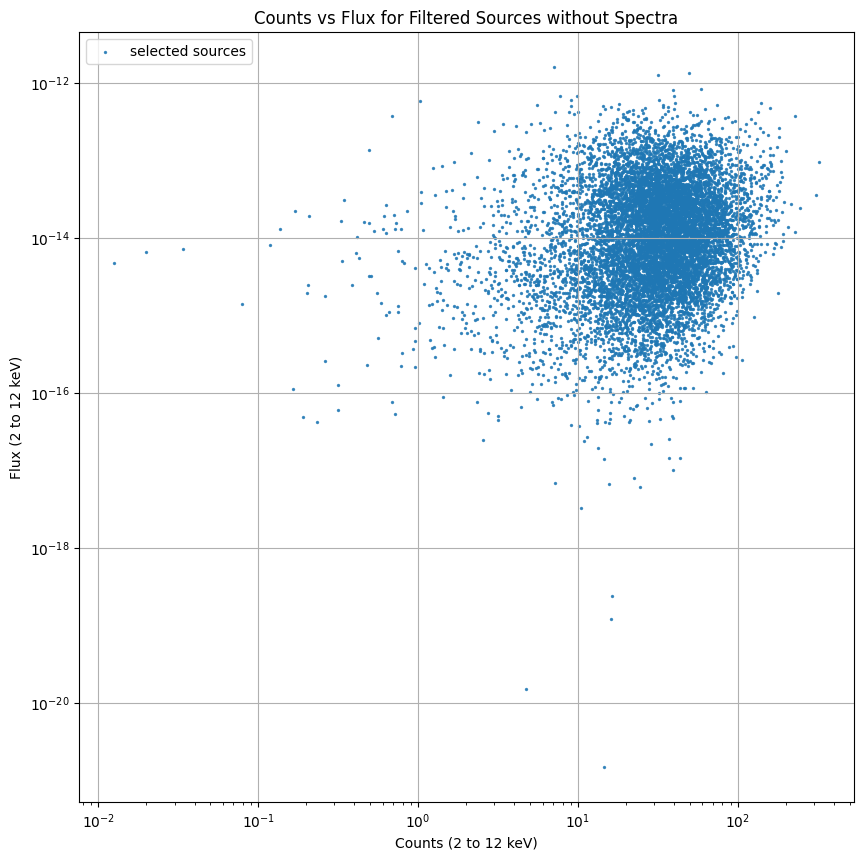

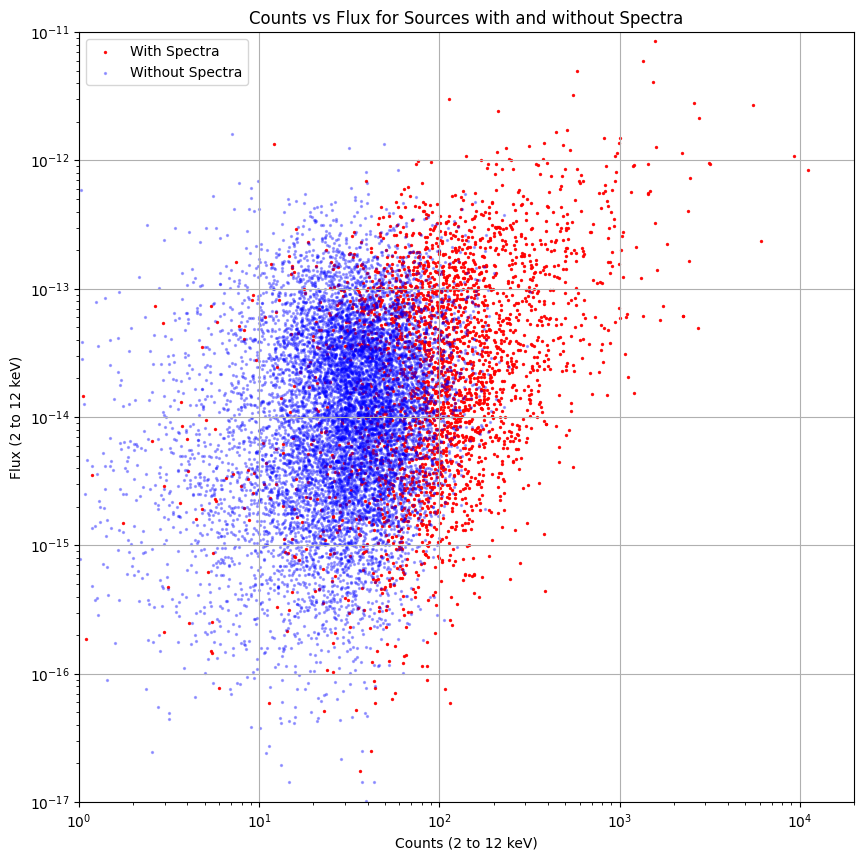

In [469]:
plt.figure(figsize=(10, 10))

# plot just your selected subset
scatter = plt.scatter(cts_list, flux_list,
            s=2, marker='o', alpha=0.8, label='selected sources')
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:

#cbar = plt.colorbar(scatter,label='Flux')
plt.xlabel('Counts (2 to 12 keV)')
plt.ylabel('Flux (2 to 12 keV)')
plt.yscale('log')
plt.xscale('log')
plt.title('Counts vs Flux for Filtered Sources with Spectra')
plt.ylim(1e-17,1e-11)
plt.xlim(1,2e4)
plt.grid(True)
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 10))

# plot just your selected subset
scatter = plt.scatter(cts_list_f, flux_list_f,
            s=2, marker='o', alpha=0.8, label='selected sources')
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:

#cbar = plt.colorbar(scatter,label='Flux')
plt.xlabel('Counts (2 to 12 keV)')
plt.ylabel('Flux (2 to 12 keV)')
plt.yscale('log')
plt.xscale('log')
plt.title('Counts vs Flux for Filtered Sources without Spectra')
plt.grid(True)
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 10))

scatter = plt.scatter(cts_list, flux_list,
            s=2, marker='o', alpha=0.9, color='red',label='With Spectra')
scatter1 = plt.scatter(cts_list_f, flux_list_f,
            s=2, marker='o', alpha=0.3, color='blue',label='Without Spectra')
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:

#cbar = plt.colorbar(scatter,label='Flux')
plt.xlabel('Counts (2 to 12 keV)')
plt.ylabel('Flux (2 to 12 keV)')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-17,1e-11)
plt.xlim(1,2e4)
plt.title('Counts vs Flux for Sources with and without Spectra')
plt.grid(True)
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()

Min value: 0.0
Max value: 7.566165576011752e-12
Data: [2.5156521e-13 6.2207164e-16 0.0000000e+00 5.9206912e-14 1.3247852e-14
 8.3673065e-14 1.6947484e-14 2.5857474e-13 5.6907217e-14 3.1388648e-13]


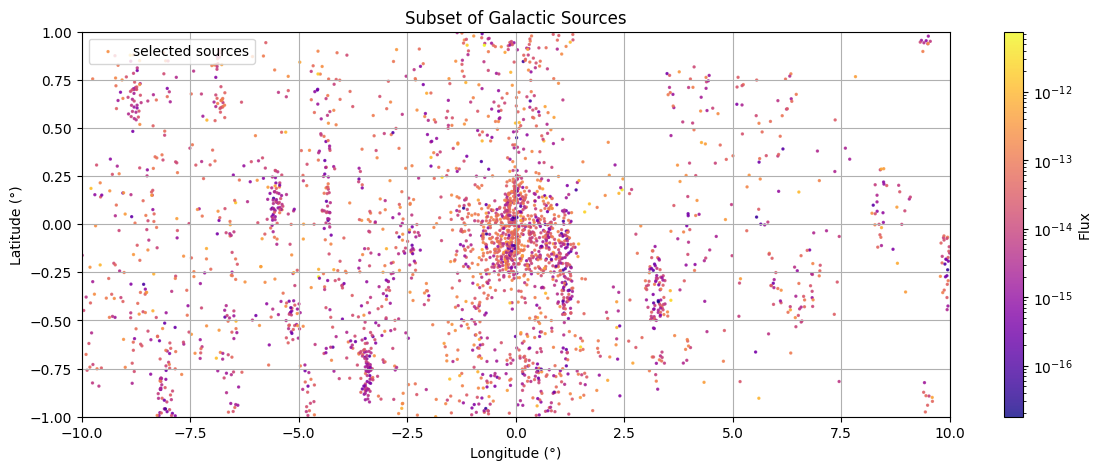

In [470]:
from matplotlib.colors import Normalize
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import LogNorm


cmap = cm.plasma
flux = xmmDR14_fx4to12[y]
color_mapped_data = cmap(flux)
print(f"Min value: {np.min(flux)}")
print(f"Max value: {np.max(flux)}")
print(f"Data: {flux[:10]}")
#print(f"Normalized data (first 10 values): {norm(flux)[:10]}")
# Display the first few rows to check the content
plt.figure(figsize=(14, 5))

# plot just your selected subset
scatter = plt.scatter(xmmDR14_l[y], xmmDR14_b[y],
            s=2, marker='o', alpha=0.8, label='selected sources',c=flux,cmap=cmap,norm=LogNorm())
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:
plt.xlim(-10, 10)
plt.ylim(-1, 1)
cbar = plt.colorbar(scatter,label='Flux')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title('Subset of Galactic Sources')
plt.grid(True)
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()

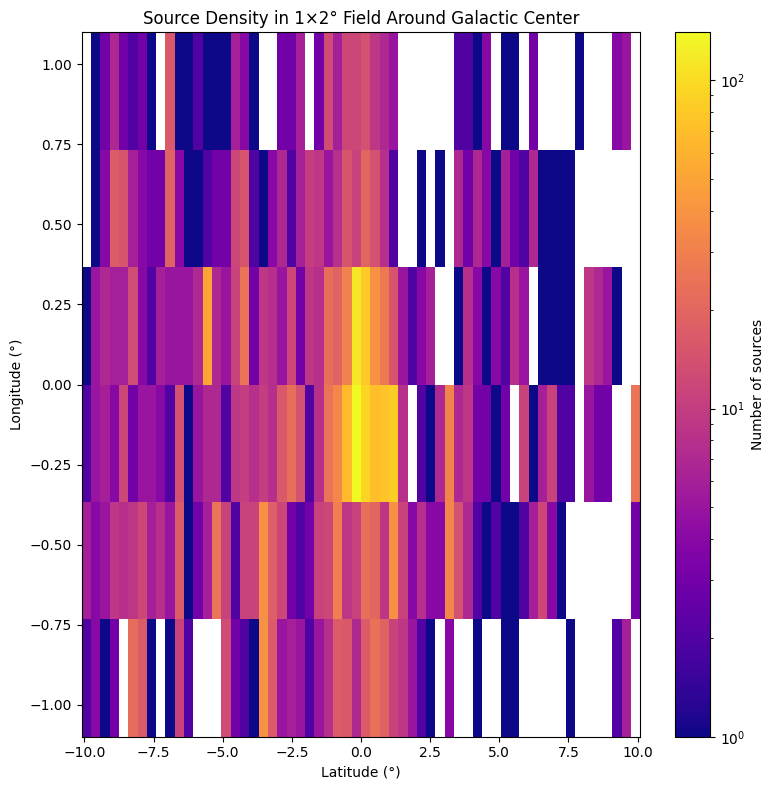

In [471]:
from matplotlib.colors import LogNorm

# ——— your data ———
# ra_all, dec_all: 1D arrays of RA/Dec in degrees for all (or subset) of sources

# ——— make the 2D histogram ———
plt.figure(figsize=(8, 8))

hb = plt.hist2d(
    xmmDR14_l[y], xmmDR14_b[y],
    bins=[60, 6],             # 60 bins in RA (x), 6 bins in Dec (y)
    range=[[-10.1, 10.1],
           [-1.1, 1.1]],
    norm=LogNorm(),           # log‐scale color by count
    cmap='plasma'             # choose whatever colormap you like
)

plt.colorbar(hb[3], label='Number of sources')
plt.xlabel('Latitude (°)')
plt.ylabel('Longitude (°)')
plt.title('Source Density in 1×2° Field Around Galactic Center')
plt.tight_layout()
plt.show()

[13509.859 25237.26   2225.753 ... 33121.195 52767.38  61310.9  ]
Min value: 554.88232421875
Max value: 325227.5
Data: [13509.859 25237.26   2225.753 17228.08  23704.504  9738.488  5365.017
  6732.191 10358.016  2885.935]


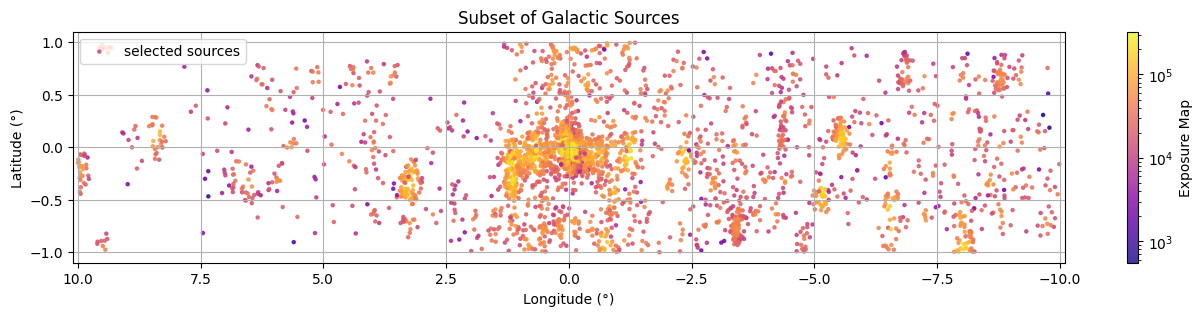

In [472]:
from matplotlib.colors import Normalize
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import LogNorm
EPexp4to12 = xmmDR14_EPexp4to12[y]
print(EPexp4to12)
cmap = cm.plasma
color_mapped_data = cmap(EPexp4to12)
print(f"Min value: {np.min(EPexp4to12)}")
print(f"Max value: {np.max(EPexp4to12)}")
print(f"Data: {EPexp4to12[:10]}")
#print(f"Normalized data (first 10 values): {norm(flux)[:10]}")
# Display the first few rows to check the content
plt.figure(figsize=(16, 3))

# plot just your selected subset
scatter = plt.scatter(xmmDR14_l[y], xmmDR14_b[y],
            s=5, marker='o', alpha=0.8, label='selected sources',c=EPexp4to12,cmap=cmap,norm=LogNorm())
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:
plt.xlim(-10.1, 10.1)
plt.ylim(-1.1, 1.1)
cbar = plt.colorbar(scatter,label='Exposure Map')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title('Subset of Galactic Sources')
plt.grid(True)
plt.gca().invert_xaxis() 
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()

In [473]:
import pickle


with open('groups.pkl', 'rb') as f:
    final_test_2sig = pickle.load(f)

In [474]:
import pickle


with open('groups.pkl', 'rb') as f:
    final_test_2sigdist = pickle.load(f)

In [475]:
import pickle


with open('groups.pkl', 'rb') as f:
    final_test_2_5sig = pickle.load(f)

In [476]:
import pickle


with open('groups.pkl', 'rb') as f:
    final_test_2sigdist_it = pickle.load(f)

In [1]:
import pickle


with open('groups.pkl', 'rb') as f:
    data = pickle.load(f)
    
final_test = data['combine_dict_test']
y = data['indices']

In [14]:
EPcts1to2 = xmmDR14_EPcts1to2[y]
EPcts2to4 = xmmDR14_EPcts2to4[y]
EPcts4to12 = xmmDR14_EPcts4to12[y]
id_list = xmmDR14_id[y]
fx2to12
flux_cts_sum = {}
flux_total = []
hardness_avg = []
cts_total = []
source_total = []
count=0
for outer_key, inner_dict in final_test.items():
    flux_cts_sum[outer_key]={}
    for inner_key, sources in inner_dict.items():
          if inner_key not in flux_cts_sum[outer_key]:
                flux_cts_sum[outer_key][inner_key]={}
                flux_sum = 0 
                cts_sum = 0
                for source in sources['sources']:
                    source_id = source['src_id']
                    row_index = np.where(id_list == source_id)[0]
                    row_index=row_index[0]
                    #flux_sum = flux_sum + fx2to12[row_index]
                    cts_sum = cts_sum + EPcts4to12[row_index]
                    flux_sum = flux_sum + source['flux']
                if len(sources['sources']) > 1 and len(sources) > 1:
                    flux_cts_sum[outer_key][inner_key]={
                        "total_flux":flux_sum,
                        "total_cts":cts_sum,
                        "mean_hardness": sources['meta'][0]['mean_hardness']
                    }
                    if cts_sum <= 300:
                        count=count+len(sources['sources'])
                    flux_total.append(flux_sum)
                    cts_total.append(cts_sum)
                    source_total.append(len(sources['sources']))
                    hardness_avg.append(sources['meta'][0]['mean_hardness'])
                else:
                    flux_cts_sum[outer_key][inner_key]={
                        "total_flux":flux_sum,
                        "total_cts":cts_sum,
                        "mean_hardness": sources['sources'][0]['hardness']
                    }
                    if cts_sum <= 300:
                        count=count+len(sources['sources'])
                    flux_total.append(flux_sum)
                    cts_total.append(cts_sum)
                    source_total.append(len(sources['sources']))
                    hardness_avg.append(sources['sources'][0]['hardness'])
                      
print(count)                  

1029


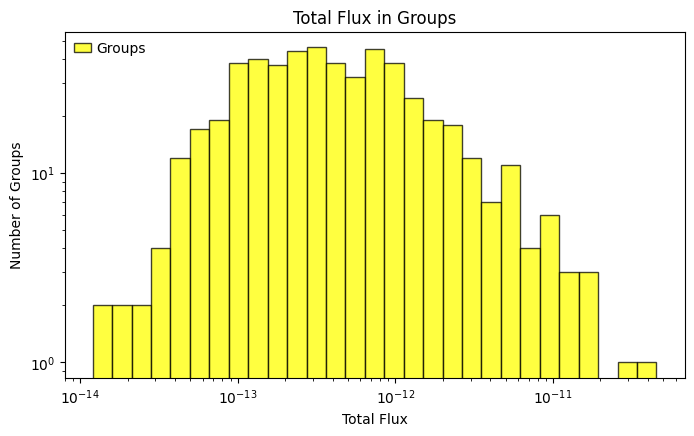

In [15]:
plt.rcParams['xtick.top'] = False
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)
num_bins=30
min_value=np.min(flux_total)
max_value=np.max(cts_total)
bins = np.linspace(min_value, max_value, num_bins + 1)  # Example for linear bins
nbins = np.logspace(np.log10(np.min(flux_total)),np.log10(np.max(flux_total)),30)
plt.figure(figsize=(8.,4.5))
plt.hist(flux_total, color='yellow', edgecolor='k', bins=nbins, label='Groups', alpha=0.75)
plt.xlabel('Total Flux')
plt.ylabel('Number of Groups')
plt.legend(loc='upper left', labelspacing=0.3, handletextpad=0.35, borderaxespad=0.3, handlelength=1.2, frameon=False, alignment='right')#, markerfirst=False

plt.xscale('log')
plt.yscale('log')
plt.title('Total Flux in Groups')

#plt.ylim(None,1.9e3)
plt.tick_params(axis='x', which='both', direction='out')

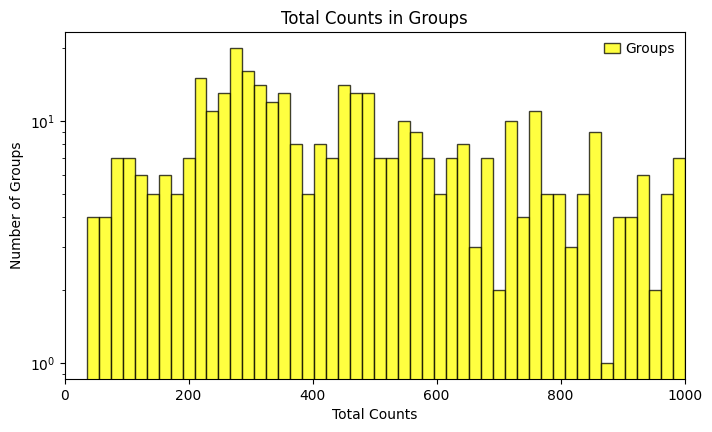

In [21]:
plt.rcParams['xtick.top'] = False
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)
num_bins=50
min_value=np.min(cts_total)
max_value=np.max(1000)
bins = np.linspace(min_value, max_value, num_bins + 1)  # Example for linear bins
nbins = np.logspace(np.log10(np.min(flux_total)),np.log10(np.max(flux_total)),20)
plt.figure(figsize=(8.,4.5))
plt.hist(cts_total, color='yellow', edgecolor='k', bins=bins, label='Groups', alpha=0.75)
plt.xlabel('Total Counts')
plt.ylabel('Number of Groups')
plt.legend(loc='upper right', labelspacing=0.3, handletextpad=0.35, borderaxespad=0.3, handlelength=1.2, frameon=False, alignment='right')#, markerfirst=False
plt.xlim(0,1000)

plt.yscale('log')
plt.title('Total Counts in Groups')

#plt.ylim(None,1.9e3)
plt.tick_params(axis='x', which='both', direction='out')

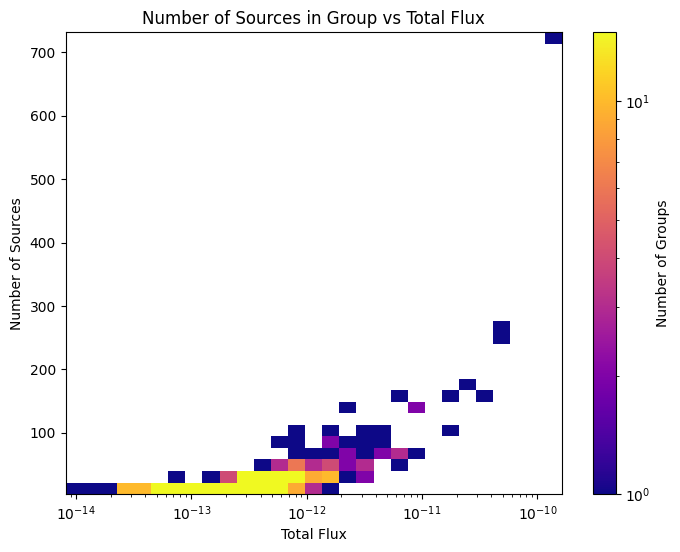

In [32]:
from matplotlib.colors import LogNorm
bins1 = np.logspace(np.log10(np.min(flux_total)),np.log10(np.max(flux_total)),30)
bins2 = np.logspace(np.log10(np.min(source_total)), np.log10(np.max(source_total)), num=50)
num_bins=40
min_value=np.min(source_total)
max_value=np.max(source_total)
bins = np.linspace(min_value, max_value, num_bins + 1)  # Example for linear bins
plt.figure(figsize=(8,6))
plt.hist2d(flux_total, source_total, bins=[bins1, bins], cmap='plasma',norm=LogNorm(vmin=1,vmax=15))
plt.xscale('log')

plt.xlabel('Total Flux')
plt.ylabel('Number of Sources')
plt.title('Number of Sources in Group vs Total Flux')
plt.colorbar(label='Number of Groups')
plt.show()

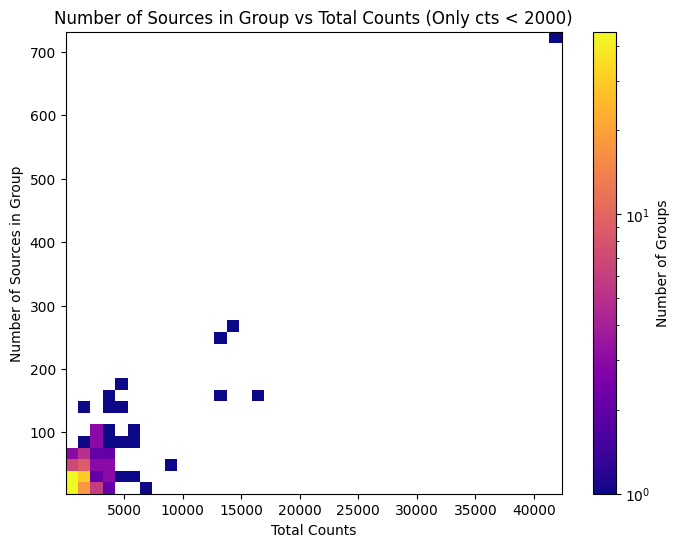

In [39]:
from matplotlib.colors import LogNorm

num_bins2=40
min_value2=np.min(source_total)
max_value2=np.max(source_total)
bins2 = np.linspace(min_value2, max_value2, num_bins2 + 1)  # Example for linear bins
num_bins1=40
min_value1=np.min(cts_total)
max_value1=np.max(cts_total)
bins1 = np.linspace(min_value1, max_value1, num_bins1 + 1)  # Example for linear bins
plt.figure(figsize=(8,6))
plt.hist2d(cts_total, source_total, bins=[bins1, bins2], cmap='plasma',norm=LogNorm(vmin=1,vmax=45))


plt.xlabel('Total Counts')
plt.ylabel('Number of Sources in Group')
plt.title('Number of Sources in Group vs Total Counts')
plt.colorbar(label='Number of Groups')
plt.show()

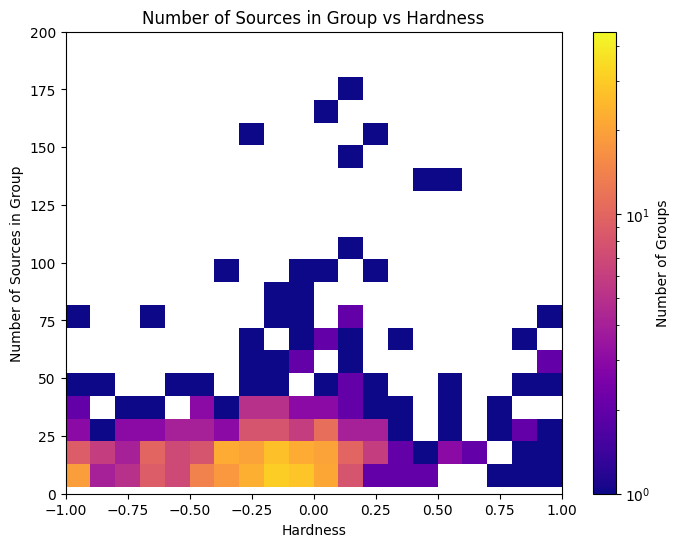

In [44]:
from matplotlib.colors import LogNorm

num_bins2=20
min_value2=np.min(source_total)
max_value2=np.max(200)
bins2 = np.linspace(min_value2, max_value2, num_bins2 + 1)  # Example for linear bins
num_bins1=20
min_value1=-1
max_value1=1
bins1 = np.linspace(min_value1, max_value1, num_bins1 + 1)  # Example for linear bins
plt.figure(figsize=(8,6))
plt.hist2d(hardness_avg, source_total, bins=[bins1, bins2], cmap='plasma',norm=LogNorm(vmin=1,vmax=45))

plt.ylim(0,200)
plt.xlabel('Hardness')
plt.ylabel('Number of Sources in Group')
plt.title('Number of Sources in Group vs Hardness')
plt.colorbar(label='Number of Groups')
plt.show()

In [572]:

fx2to12 = []
for i,data in enumerate(y):
    fx2to12.append(fx2to4[i] + fx4to12[i])
    if fx2to12[i] == 0:
        print(i)
        
fx4to12

array([2.5156521e-13, 6.2207164e-16, 0.0000000e+00, ..., 6.7734328e-15,
       4.9342071e-15, 1.3461092e-13], dtype=float32)

0.0
4.6080764e-18
7.566166e-12


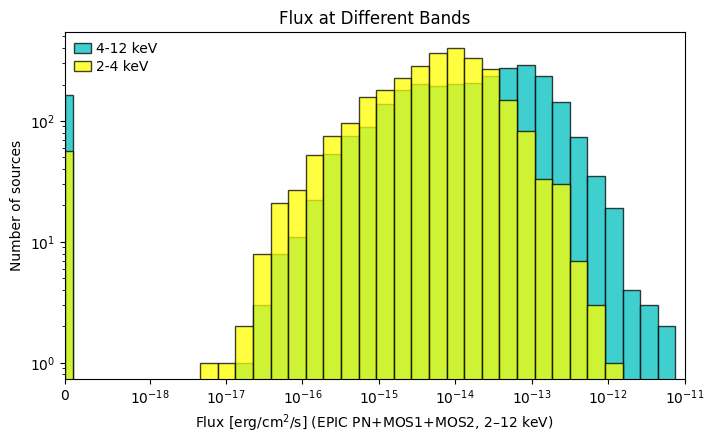

In [573]:
print(fx2to4.min())
plt.rcParams['xtick.top'] = False
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)
min_nonzero = np.min(fx2to4[fx2to4 > 0])
print(min_nonzero)
max_nonzero = np.max(fx4to12[fx4to12 > 0])
print(max_nonzero)
nbins = np.logspace(np.log10(min_nonzero),np.log10(max_nonzero),28)
zero_bin_edge = 1e-19
bins = np.concatenate([[0, zero_bin_edge], nbins])
plt.figure(figsize=(8.,4.5))
plt.hist(fx4to12, color='c', edgecolor='k', bins=bins, label='4-12 keV', alpha=0.75)
plt.hist(fx2to4, color='yellow', edgecolor='k', bins=bins, label='2-4 keV', alpha=0.75)
plt.xlabel('Flux [erg/cm$^2$/s] (EPIC PN+MOS1+MOS2, 2–12 keV)')
plt.ylabel('Number of sources')
plt.legend(loc='upper left', labelspacing=0.3, handletextpad=0.35, borderaxespad=0.3, handlelength=1.2, frameon=False, alignment='right')#, markerfirst=False
plt.yscale('log')
plt.xscale('symlog', linthresh=1e-18)
plt.xlim(0,10e-12)
plt.title('Flux at Different Bands')

#plt.ylim(None,1.9e3)
plt.tick_params(axis='x', which='both', direction='out')

0.0


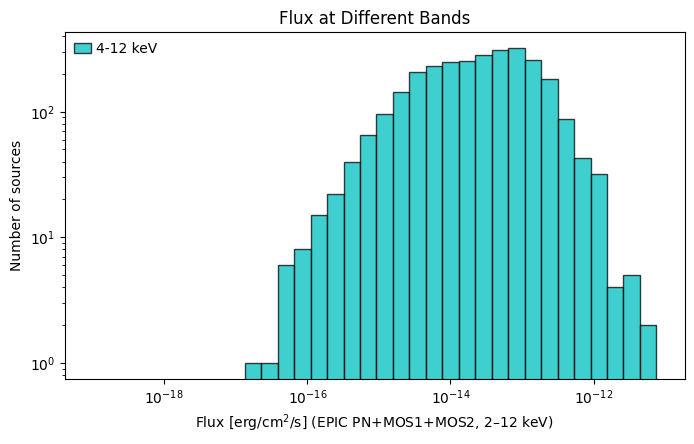

In [574]:
print(fx2to4.min())
plt.rcParams['xtick.top'] = False
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)

nbins = np.logspace(np.log10(np.min(fx2to12)),np.log10(np.max(fx2to12)),28)
plt.figure(figsize=(8.,4.5))
plt.hist(fx2to12, color='c', edgecolor='k', bins=bins, label='4-12 keV', alpha=0.75)
plt.xlabel('Flux [erg/cm$^2$/s] (EPIC PN+MOS1+MOS2, 2–12 keV)')
plt.ylabel('Number of sources')
plt.legend(loc='upper left', labelspacing=0.3, handletextpad=0.35, borderaxespad=0.3, handlelength=1.2, frameon=False, alignment='right')#, markerfirst=False
plt.yscale('log')
plt.xscale('log')

plt.title('Flux at Different Bands')

#plt.ylim(None,1.9e3)
plt.tick_params(axis='x', which='both', direction='out')

In [45]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
l = xmmDR14_l[y]
b = xmmDR14_b[y]
def get_nh_value_at_coords(fits_file, l_deg, b_deg):
    """
    Given a FITS nH map and Galactic coordinates (l_deg, b_deg),
    return the nH value(s) at that position using the WCS from the file.
    Handles both scalar and array inputs for l_deg and b_deg.
    """
    with fits.open(fits_file) as hdul:
        data = hdul[0].data
        header = hdul[0].header
        wcs = WCS(header)

        # Convert (l, b) to pixel coordinates (origin=1 for FITS convention)
        x_pix, y_pix = wcs.wcs_world2pix(l_deg, b_deg, 1)

        # Handle scalar and array input
        if isinstance(x_pix, np.ndarray):
            x_idx = np.round(x_pix).astype(int) - 1
            y_idx = np.round(y_pix).astype(int) - 1
        else:
            x_idx = int(round(x_pix)) - 1
            y_idx = int(round(y_pix)) - 1

        ny, nx = data.shape

        # Check bounds
        if isinstance(x_idx, np.ndarray):
            mask = (x_idx >= 0) & (x_idx < nx) & (y_idx >= 0) & (y_idx < ny)
            values = np.full(x_idx.shape, np.nan)
            values[mask] = data[y_idx[mask], x_idx[mask]]
            return values
        else:
            if x_idx < 0 or x_idx >= nx or y_idx < 0 or y_idx >= ny:
                return np.nan
            return data[y_idx, x_idx]
    
fits_file = 'nH_Analysis/column_density_inner20deg_filled.fits'
l_deg = 10.0
b_deg = 0.5
nh_val = []
print(f"nH value at (l={l_deg}, b={b_deg}): {nh_val}")
for i, src_id in enumerate(SrcID_filt):
    nh_val.append(get_nh_value_at_coords(fits_file, l[i], b[i]))

len(nh_val)

nH value at (l=10.0, b=0.5): []


12609

In [46]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
l = xmmDR14_l[y]
b = xmmDR14_b[y]
def get_extinction_value_at_coords(fits_file, l_deg, b_deg):
    """
    Given a FITS nH map and Galactic coordinates (l_deg, b_deg),
    return the nH value(s) at that position using the WCS from the file.
    Handles both scalar and array inputs for l_deg and b_deg.
    """
    with fits.open(fits_file) as hdul:
        data = hdul[0].data
        header = hdul[0].header
        wcs = WCS(header)

        # Convert (l, b) to pixel coordinates (origin=1 for FITS convention)
        x_pix, y_pix = wcs.wcs_world2pix(l_deg, b_deg, 1)

        # Handle scalar and array input
        if isinstance(x_pix, np.ndarray):
            x_idx = np.round(x_pix).astype(int) - 1
            y_idx = np.round(y_pix).astype(int) - 1
        else:
            x_idx = int(round(x_pix)) - 1
            y_idx = int(round(y_pix)) - 1

        ny, nx = data.shape

        # Check bounds
        if isinstance(x_idx, np.ndarray):
            mask = (x_idx >= 0) & (x_idx < nx) & (y_idx >= 0) & (y_idx < ny)
            values = np.full(x_idx.shape, np.nan)
            values[mask] = data[y_idx[mask], x_idx[mask]]
            return values
        else:
            if x_idx < 0 or x_idx >= nx or y_idx < 0 or y_idx >= ny:
                return np.nan
            return data[y_idx, x_idx]
    
fits_file = 'extinction_analysis/VVVextmap_galactic_center_perfect.fits'
l_deg = 10.0
b_deg = 0.5
extinction_val = []
print(f"extinction value at (l={l_deg}, b={b_deg}): {extinction_val}")
for i, src_id in enumerate(SrcID_filt):
    extinction_val.append(get_extinction_value_at_coords(fits_file, l[i], b[i]))

len(extinction_val)

extinction value at (l=10.0, b=0.5): []


12609

In [47]:
mean_nh =[]
for outer_key, inner_dict in final_test.items():
    for inner_key, sources in inner_dict.items():
        if len(sources['sources'])>1 and len(sources)>1:
            mean_nh.append(sources['meta'][0]['mean_nH'])
        else:
            mean_nh.append(sources['sources'][0]['nh'])
            
                
                    
                    
                    

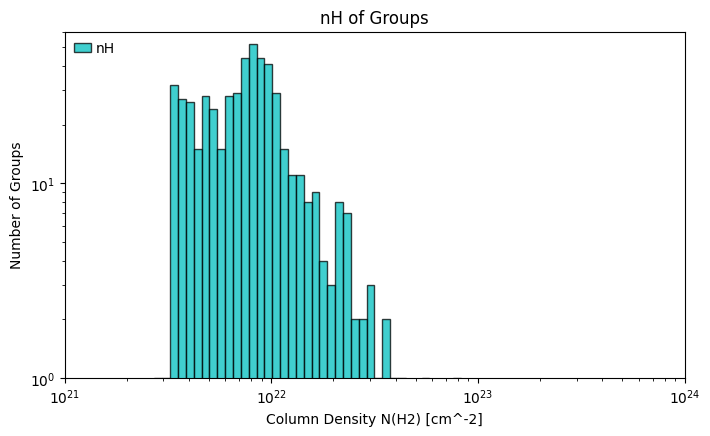

In [48]:
plt.rcParams['xtick.top'] = False
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)
nbins = np.logspace(np.log10(np.min(mean_nh)),np.log10(np.max(mean_nh)),40)
plt.figure(figsize=(8.,4.5))
plt.hist(mean_nh, color='c', edgecolor='k', bins=nbins, label='nH', alpha=0.75)
plt.xlabel('Column Density N(H2) [cm^-2]')
plt.ylabel('Number of Groups')
plt.legend(loc='upper left', labelspacing=0.3, handletextpad=0.35, borderaxespad=0.3, handlelength=1.2, frameon=False, alignment='right')#, markerfirst=False
plt.yscale('log')
plt.xscale('log')
plt.ylim(1,6e1)
plt.xlim(1e21,1e24)
plt.title('nH of Groups')
#plt.ylim(None,1.9e3)
plt.tick_params(axis='x', which='both', direction='out')

In [49]:
plt.rcParams['xtick.top'] = False
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)
nbins = np.logspace(np.log10(np.min(nh_val)),np.log10(np.max(nh_val)),50)
plt.figure(figsize=(8.,4.5))
plt.hist(nh_val, color='c', edgecolor='k', bins=nbins, label='nH', alpha=0.75)
plt.xlabel('Column Density N(H2) [cm^-2]')
plt.ylabel('Number of sources')
plt.legend(loc='upper left', labelspacing=0.3, handletextpad=0.35, borderaxespad=0.3, handlelength=1.2, frameon=False, alignment='right')#, markerfirst=False
plt.yscale('log')
plt.xscale('log')
plt.title('nH of Filtered Sources')
#plt.ylim(None,1.9e3)
plt.tick_params(axis='x', which='both', direction='out')

Error in callback <function _draw_all_if_interactive at 0x10fe52f20> (for post_execute):


ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 800x450 with 1 Axes>

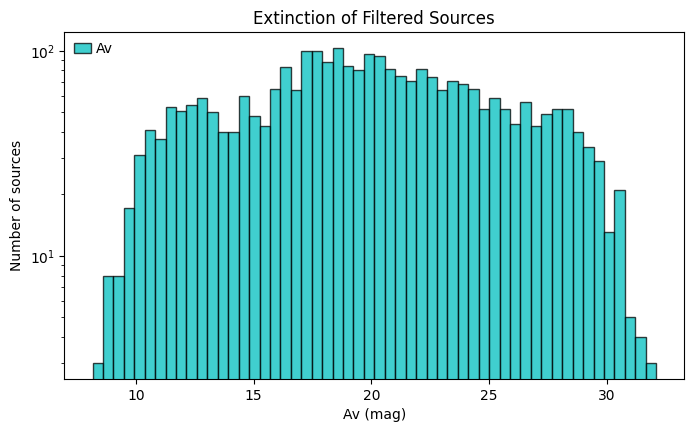

In [491]:
plt.rcParams['xtick.top'] = False
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)
data_min = np.min(extinction_val)
data_max = np.max(extinction_val)

# Choose number of bins (e.g., sqrt rule)
n_bins = int(np.ceil(np.sqrt(len(extinction_val))))

# Calculate bin width
bin_width = (data_max - data_min) / n_bins

# Create bin edges
bins = np.arange(data_min, data_max + bin_width, bin_width)
nbins = np.logspace(np.log10(np.min(extinction_val)),np.log10(np.max(extinction_val)),50)
plt.figure(figsize=(8.,4.5))
plt.hist(extinction_val, color='c', edgecolor='k', bins=bins, label='Av', alpha=0.75)
plt.xlabel('Av (mag)')
plt.ylabel('Number of sources')
plt.legend(loc='upper left', labelspacing=0.3, handletextpad=0.35, borderaxespad=0.3, handlelength=1.2, frameon=False, alignment='right')#, markerfirst=False
plt.yscale('log')
plt.title('Extinction of Filtered Sources')

#plt.ylim(None,1.9e3)
plt.tick_params(axis='x', which='both', direction='out')

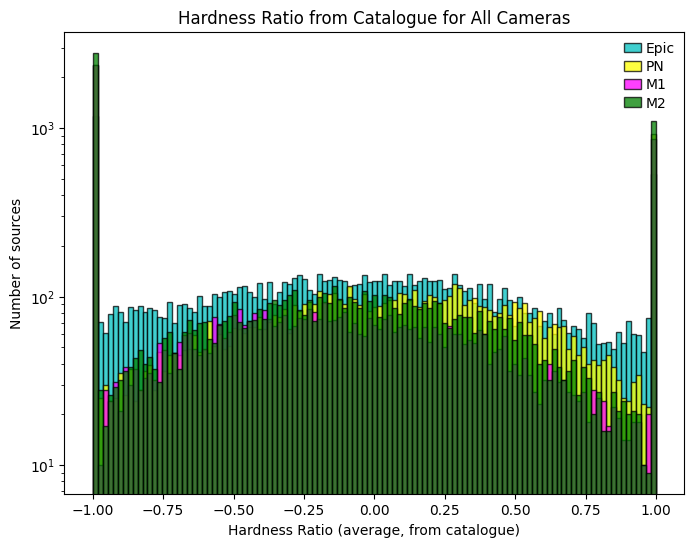

In [50]:
EPhr4 = xmmDR14_EPhr4[y]
PNhr4 = xmmDR14_PNhr4[y] 
M1hr4 = xmmDR14_M1hr4[y]
M2hr4 = xmmDR14_M2hr4[y]
plt.rcParams['xtick.top'] = False

data_min = -1
data_max = 1

# Choose number of bins (e.g., sqrt rule)
n_bins = int(np.ceil(np.sqrt(len(EPhr4))))

# Calculate bin width

bin_edges = np.linspace(data_min, data_max, n_bins + 1)

plt.figure(figsize=(8.,6))
plt.hist(EPhr4, color='c', edgecolor='k', bins=bin_edges, label='Epic', alpha=0.75)
plt.hist(PNhr4, color='yellow', edgecolor='k', bins=bin_edges, label='PN', alpha=0.75)
plt.hist(M1hr4, color='magenta', edgecolor='k', bins=bin_edges, label='M1', alpha=0.75)
plt.hist(M2hr4, color='green', edgecolor='k', bins=bin_edges, label='M2', alpha=0.75)
plt.xlabel('Hardness Ratio (average, from catalogue)')
plt.ylabel('Number of sources')
plt.legend(loc='upper right', labelspacing=0.3, handletextpad=0.35, borderaxespad=0.3, handlelength=1.2, frameon=False, alignment='right')#, markerfirst=False
plt.yscale('log')
plt.title('Hardness Ratio from Catalogue for All Cameras')


#plt.ylim(None,1.9e3)
plt.tick_params(axis='x', which='both', direction='out')

In [51]:
count = 0
for i,data in enumerate(y):
    if EPhr4[i] == -1:
        count=count+1

count

1091

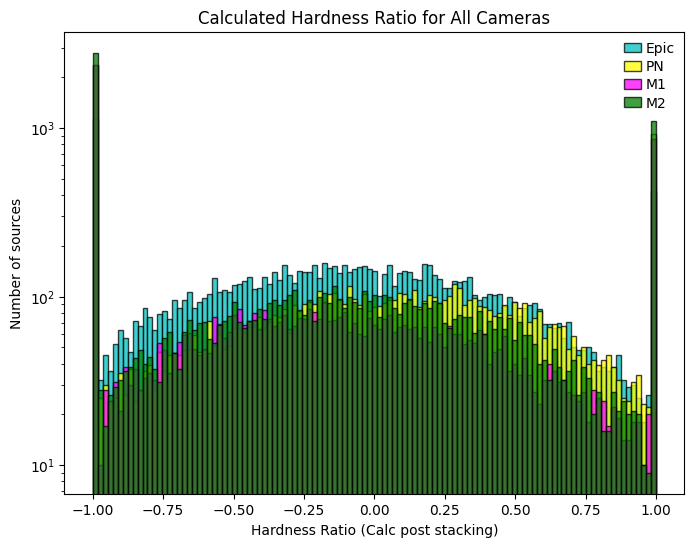

In [52]:
#hardness ratio: (4to12 - 2to4)/(4to12 + 2to4) [similar to HR2, except 4to12 vs 4to8]
PNhr2_filt = PNhr2[y]
M1hr2_filt = M1hr2[y]
M2hr2_filt = M2hr2[y]
#combined EPIC HR
EPhr2_filt = EPhr2[y]

plt.rcParams['xtick.top'] = False
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)
data_min = -1
data_max = 1

# Choose number of bins (e.g., sqrt rule)
n_bins = int(np.ceil(np.sqrt(len(EPhr2_filt))))

# Calculate bin width

bin_edges = np.linspace(data_min, data_max, n_bins + 1)

# Create bin edges
plt.figure(figsize=(8.,6))
plt.hist(EPhr2_filt, color='c', edgecolor='k', bins=bin_edges, label='Epic', alpha=0.75)
plt.hist(PNhr2_filt, color='yellow', edgecolor='k', bins=bin_edges, label='PN', alpha=0.75)
plt.hist(M1hr2_filt, color='magenta', edgecolor='k', bins=bin_edges, label='M1', alpha=0.75)
plt.hist(M2hr2_filt, color='green', edgecolor='k', bins=bin_edges, label='M2', alpha=0.75)
plt.xlabel('Hardness Ratio (Calc post stacking)')
plt.ylabel('Number of sources')
plt.legend(loc='upper right', labelspacing=0.3, handletextpad=0.35, borderaxespad=0.3, handlelength=1.2, frameon=False, alignment='right')#, markerfirst=False
plt.yscale('log')
plt.title('Calculated Hardness Ratio for All Cameras')

#plt.ylim(None,1.9e3)
plt.tick_params(axis='x', which='both', direction='out')

In [53]:
count = 0
for i,data in enumerate(y):
    if EPhr2_filt[i] == -1:
        count=count+1

count

1091

nan


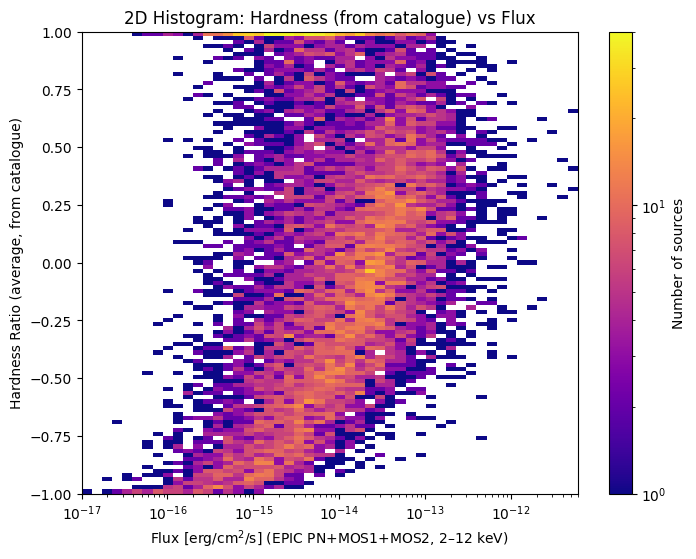

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
print(np.min(nh_val))
# Define flux bins (e.g., logarithmic bins)
bins1 = np.logspace(np.log10(1e-17), np.log10(6e-12), num=50)
data_min = -1
data_max = 1

# Choose number of bins (e.g., sqrt rule)
n_bins = int(np.ceil(np.sqrt(len(EPhr4))))

# Calculate bin width

bin_edges = np.linspace(data_min, data_max, n_bins + 1)

plt.figure(figsize=(8,6))
plt.hist2d(fx4to12, EPhr4, bins=[bins1, bin_edges], cmap='plasma',norm=LogNorm())
plt.xscale('log')
plt.xlabel('Flux [erg/cm$^2$/s] (EPIC PN+MOS1+MOS2, 2–12 keV)')
plt.ylabel('Hardness Ratio (average, from catalogue)')
plt.title('2D Histogram: Hardness (from catalogue) vs Flux')
plt.colorbar(label='Number of sources')
plt.show()

nan


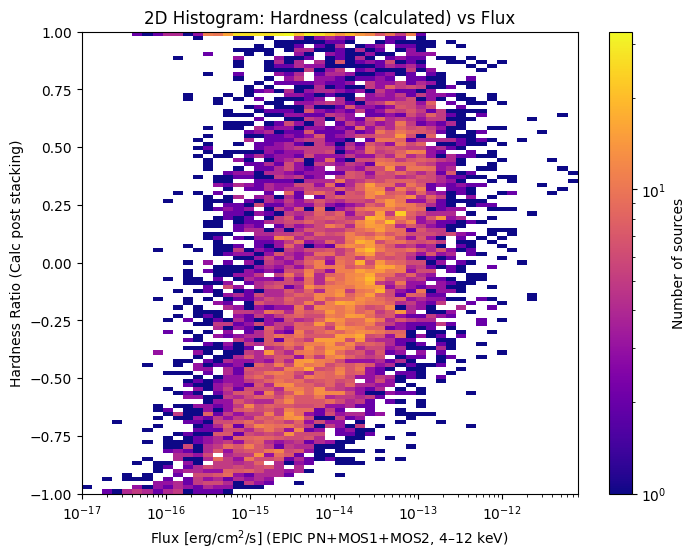

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
print(np.min(nh_val))
# Define flux bins (e.g., logarithmic bins)
bins1 = np.logspace(np.log10(1e-17), np.log10(8e-12), num=50)
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)
data_min = -1
data_max = 1

# Choose number of bins (e.g., sqrt rule)
n_bins = int(np.ceil(np.sqrt(len(EPhr2_filt))))

# Calculate bin width

bin_edges = np.linspace(data_min, data_max, n_bins + 1)

plt.figure(figsize=(8,6))
plt.hist2d(fx4to12, EPhr2_filt, bins=[bins1, bin_edges], cmap='plasma',norm=LogNorm())
plt.xscale('log')
plt.xlabel('Flux [erg/cm$^2$/s] (EPIC PN+MOS1+MOS2, 4–12 keV)')
plt.ylabel('Hardness Ratio (Calc post stacking)')
plt.title('2D Histogram: Hardness (calculated) vs Flux')
plt.colorbar(label='Number of sources')
plt.show()

nan


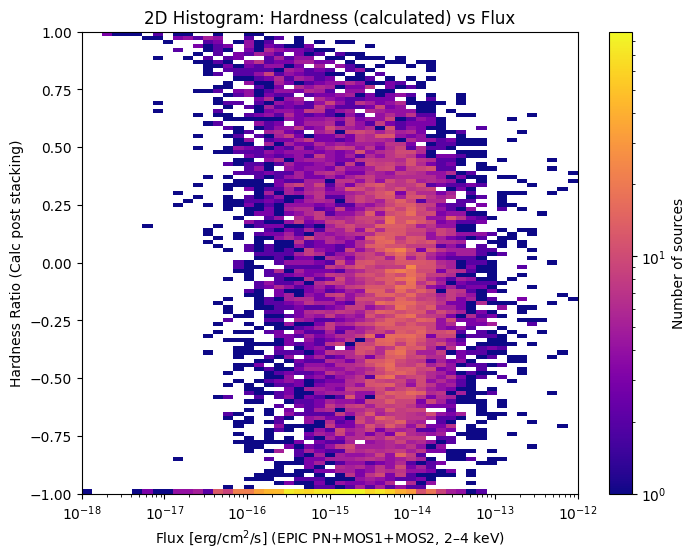

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
print(np.min(nh_val))
# Define flux bins (e.g., logarithmic bins)
bins1 = np.logspace(np.log10(1e-18), np.log10(1e-12), num=50)
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)
data_min = -1
data_max = 1

# Choose number of bins (e.g., sqrt rule)
n_bins = int(np.ceil(np.sqrt(len(EPhr2_filt))))

# Calculate bin width

bin_edges = np.linspace(data_min, data_max, n_bins + 1)

plt.figure(figsize=(8,6))
plt.hist2d(fx2to4, EPhr2_filt, bins=[bins1, bin_edges], cmap='plasma',norm=LogNorm())
plt.xscale('log')
plt.xlabel('Flux [erg/cm$^2$/s] (EPIC PN+MOS1+MOS2, 2–4 keV)')
plt.ylabel('Hardness Ratio (Calc post stacking)')
plt.title('2D Histogram: Hardness (calculated) vs Flux')
plt.colorbar(label='Number of sources')
plt.show()

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

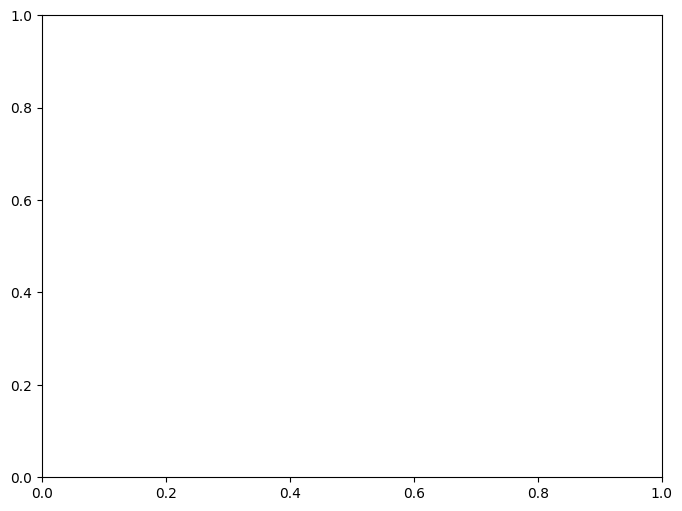

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
data_min = -1
data_max = 1

# Choose number of bins (e.g., sqrt rule)
n_bins = int(np.ceil(np.sqrt(len(EPhr4))))

# Calculate bin width

bin_edges = np.linspace(data_min, data_max, n_bins + 1)

bins2 = np.logspace(np.log10(np.min(nh_val)), np.log10(np.max(nh_val)), num=50)
plt.figure(figsize=(8,6))
plt.hist2d(EPhr4, nh_val, bins=[bin_edges, bins2], cmap='plasma',norm=LogNorm())
plt.yscale('log')
plt.xlabel('Hardness Ratio (average, from catalogue)')
plt.ylabel('nH, Column Density N(H2) [cm^-2]')
plt.title('2D Histogram: nH vs Hardness')
plt.colorbar(label='Number of sources')
plt.show()

nan


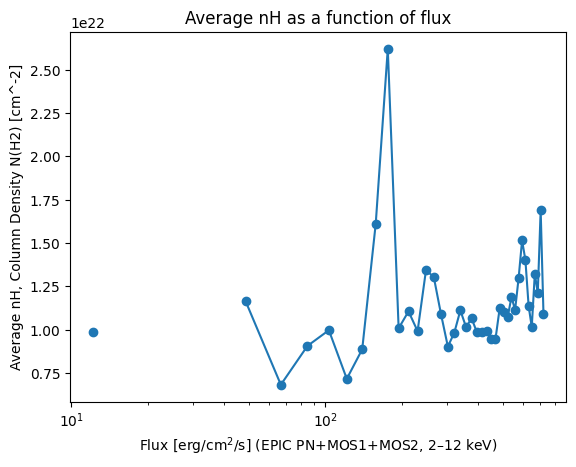

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

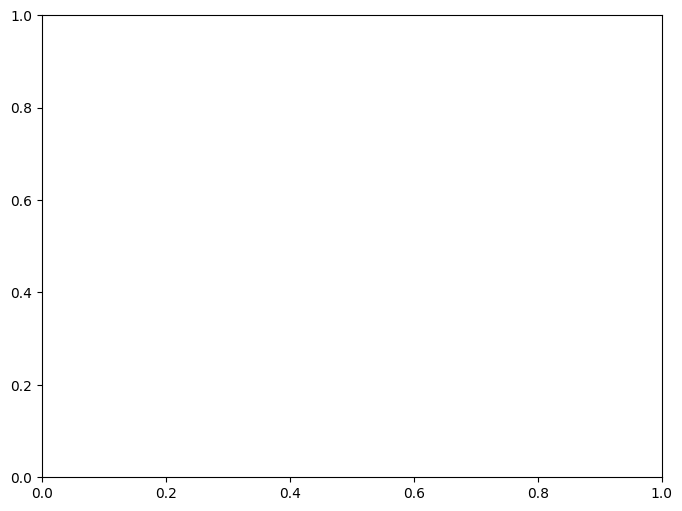

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
print(np.min(nh_val))
# Define flux bins (e.g., logarithmic bins)
bins1 = np.logspace(np.log10(1e-17), np.log10(8e-12), num=50)
bins2 = np.logspace(np.log10(np.min(nh_val)), np.log10(np.max(nh_val)), num=50)
# Digitize flux values into bins
bin_indices = np.digitize(fx4to12, bins1)
nh_val = np.array(nh_val)
# Compute average nH in each flux bin
nh_means = []
bin_centers = []
for i in range(1, len(bins)):
    in_bin = (bin_indices == i)
    if np.any(in_bin):
        nh_means.append(np.nanmean(nh_val[in_bin]))
        bin_centers.append((bins[i-1] + bins[i]) / 2)
    else:
        nh_means.append(np.nan)
        bin_centers.append((bins[i-1] + bins[i]) / 2)

# Plot
plt.figure()
plt.plot(bin_centers, nh_means, marker='o')
plt.xscale('log')
plt.xlabel('Flux [erg/cm$^2$/s] (EPIC PN+MOS1+MOS2, 2–12 keV)')
plt.ylabel('Average nH, Column Density N(H2) [cm^-2]')
plt.title('Average nH as a function of flux')
plt.show()
plt.figure(figsize=(8,6))
plt.hist2d(fx4to12, nh_val, bins=[bins1, bins2], cmap='plasma',norm=LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Flux [erg/cm$^2$/s] (EPIC PN+MOS1+MOS2, 4–12 keV)')
plt.ylabel('nH, Column Density N(H2) [cm^-2]')
plt.title('2D Histogram: nH vs Flux')
plt.colorbar(label='Number of sources')
plt.show()

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

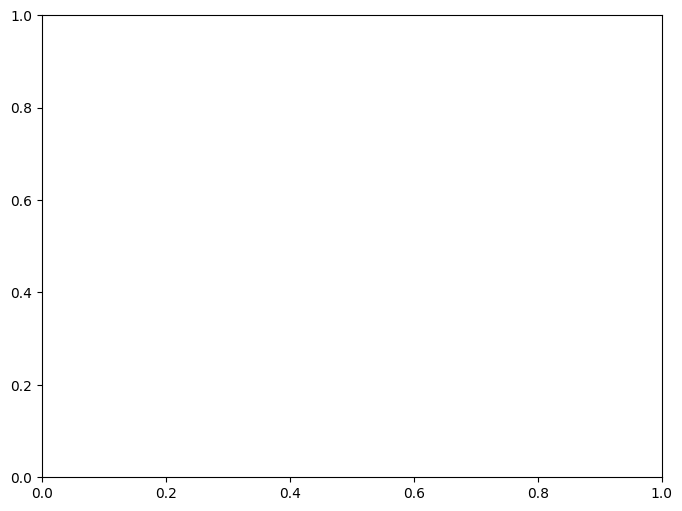

In [59]:
bins1 = np.logspace(np.log10(1e-18), np.log10(1e-12), num=50)
bins2 = np.logspace(np.log10(np.min(nh_val)), np.log10(np.max(nh_val)), num=50)
plt.figure(figsize=(8,6))
plt.hist2d(fx2to4, nh_val, bins=[bins1, bins2], cmap='plasma',norm=LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Flux [erg/cm$^2$/s] (EPIC PN+MOS1+MOS2, 2–4 keV)')
plt.ylabel('nH, Column Density N(H2) [cm^-2]')
plt.title('2D Histogram: nH vs Flux ()')
plt.colorbar(label='Number of sources')
plt.show()

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
data_min = np.min(extinction_val)
data_max = np.max(extinction_val)

# Choose number of bins (e.g., sqrt rule)
n_bins = int(np.ceil(np.sqrt(len(extinction_val))))

# Calculate bin width
bin_width = (data_max - data_min) / n_bins

# Create bin edges
bins = np.arange(data_min, data_max + bin_width, bin_width)
bins2 = np.logspace(np.log10(np.min(nh_val)), np.log10(np.max(nh_val)), num=50)
plt.figure(figsize=(8,6))
plt.hist2d(extinction_val, nh_val, bins=[bins, bins2], cmap='plasma',norm=LogNorm())
plt.yscale('log')
plt.xlabel('Extinction [Av (mag)]')
plt.ylabel('nH, Column Density N(H2) [cm^-2]')
plt.title('2D Histogram: nH vs Extinction')
plt.colorbar(label='Number of sources')
plt.show()

ValueError: arange: cannot compute length

Min value: nan
Max value: nan
Data: [ 0.1161441 -1.         0.2949933  0.8285501  0.2280964  0.528597
 -1.        -1.         0.9086095 -0.5664151]


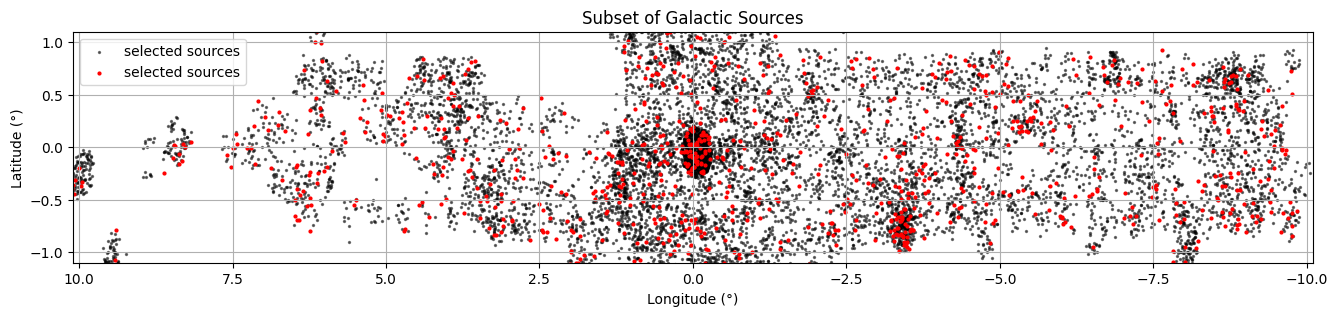

In [61]:
from matplotlib.colors import Normalize
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import LogNorm
l_filt = xmmDR14_l[y]
b_filt = xmmDR14_b[y]
list_1 = []
list_else = []
EPhr4_1 = []
l_1 = []
b_1 = []
EPhr4_else = []
l_else = []
b_else = []
for i,data in enumerate(y):
    if EPhr4[i] == -1:
        EPhr4_1.append(EPhr4[i])
        l_1.append(l_filt[i])
        b_1.append(b_filt[i])
        list_1.append(i)
    else:
        EPhr4_else.append(EPhr4[i])
        l_else.append(l_filt[i])
        b_else.append(b_filt[i])
        list_else.append(i)

cmap = cm.plasma
color_mapped_data = cmap(EPhr4)
print(f"Min value: {np.min(EPhr4)}")
print(f"Max value: {np.max(EPhr4)}")
print(f"Data: {EPhr4[:10]}")
#print(f"Normalized data (first 10 values): {norm(flux)[:10]}")
# Display the first few rows to check the content
plt.figure(figsize=(16, 3))

# plot just your selected subset
scatter1 = plt.scatter(l_else, b_else,
            s=2, marker='o', alpha=0.5, label='selected sources',c='black')
scatter2 = plt.scatter(l_1, b_1,
            s=4, marker='o', alpha=1, label='selected sources',c='red')
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:
plt.xlim(-10.1, 10.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title('Subset of Galactic Sources')
plt.grid(True)
plt.gca().invert_xaxis() 
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()

In [62]:
list_1

[1,
 6,
 7,
 13,
 19,
 22,
 28,
 29,
 38,
 41,
 43,
 50,
 60,
 73,
 77,
 80,
 86,
 97,
 100,
 102,
 103,
 120,
 137,
 146,
 154,
 178,
 180,
 189,
 199,
 207,
 208,
 238,
 246,
 260,
 262,
 268,
 269,
 274,
 276,
 309,
 330,
 332,
 340,
 354,
 357,
 366,
 380,
 393,
 409,
 415,
 424,
 431,
 441,
 446,
 449,
 462,
 508,
 537,
 544,
 546,
 576,
 585,
 588,
 591,
 598,
 616,
 637,
 639,
 667,
 685,
 691,
 743,
 751,
 753,
 765,
 774,
 781,
 783,
 789,
 794,
 806,
 811,
 818,
 825,
 848,
 871,
 910,
 928,
 932,
 943,
 966,
 974,
 980,
 993,
 994,
 1001,
 1006,
 1023,
 1040,
 1080,
 1087,
 1111,
 1113,
 1118,
 1158,
 1206,
 1217,
 1225,
 1250,
 1261,
 1279,
 1293,
 1320,
 1325,
 1334,
 1344,
 1346,
 1350,
 1352,
 1354,
 1372,
 1386,
 1399,
 1401,
 1406,
 1412,
 1416,
 1423,
 1461,
 1464,
 1473,
 1483,
 1486,
 1501,
 1506,
 1507,
 1511,
 1516,
 1534,
 1535,
 1547,
 1558,
 1559,
 1565,
 1579,
 1589,
 1619,
 1635,
 1661,
 1669,
 1672,
 1703,
 1713,
 1715,
 1722,
 1730,
 1744,
 1752,
 1753,
 17

In [63]:
EPexp4to12 = xmmDR14_EPexp4to12[y]
EPhr2 = xmmDR14_EPhr2[y]
EPhr3 = xmmDR14_EPhr3[y]
l_filt = xmmDR14_l[y]
b_filt = xmmDR14_b[y]
EPhr4_1 = []
EPhr4_1_filt = []
EPhr3_1 = []
EPhr3_1_filt = []
EPhr2_1 = []
EPhr2_1_filt = []
l_1 = []
b_1 = []
l_1_filt = []
b_1_filt = []
EPhr4_else = []
EPhr3_else = []
EPhr2_else = []
l_else = []
b_else = []
EPhr4_else_filt = []
EPhr3_else_filt = []
EPhr2_else_filt = []
l_else_filt = []
b_else_filt = []
for i,data in enumerate(y):
    if EPhr4[i] == -1:
        EPhr4_1.append(EPhr4[i])
        EPhr3_1.append(EPhr3[i])
        EPhr2_1.append(EPhr2[i])
        l_1.append(l_filt[i])
        b_1.append(b_filt[i])
        if (EPexp4to12[i] >= 20000) & (EPexp4to12[i] <= 40000):
            EPhr4_1_filt.append(EPhr4[i])
            EPhr3_1_filt.append(EPhr3[i])
            EPhr2_1_filt.append(EPhr2[i])
            l_1_filt.append(l_filt[i])
            b_1_filt.append(b_filt[i])
    else:
        EPhr4_else.append(EPhr4[i])
        EPhr3_else.append(EPhr3[i])
        EPhr2_else.append(EPhr2[i])
        l_else.append(l_filt[i])
        b_else.append(b_filt[i])
        if (EPexp4to12[i] >= 20000) & (EPexp4to12[i] <= 40000):
            EPhr4_else_filt.append(EPhr4[i])
            EPhr3_else_filt.append(EPhr3[i])
            EPhr2_else_filt.append(EPhr2[i])
            l_else_filt.append(l_filt[i])
            b_else_filt.append(b_filt[i])


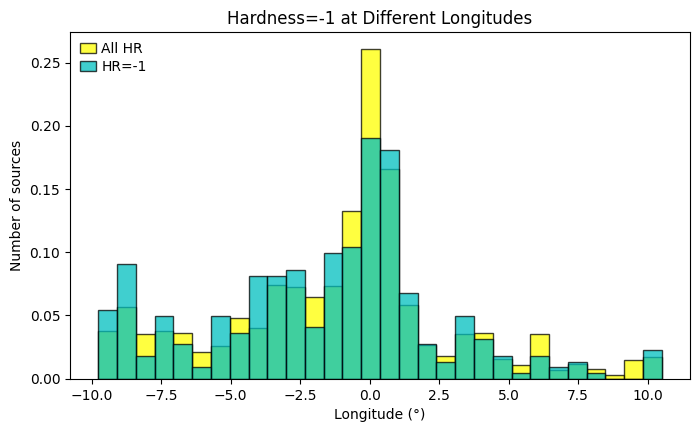

In [64]:
plt.rcParams['xtick.top'] = False
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)
num_bins=30
min_value=np.min(l_1_filt)
max_value=np.max(l_else_filt)
bins = np.linspace(min_value, max_value, num_bins + 1)  # Example for linear bins

plt.figure(figsize=(8.,4.5))
plt.hist(l_else_filt, color='yellow', edgecolor='k', bins=bins, label='All HR', alpha=0.75,density=True)
plt.hist(l_1_filt, color='c', edgecolor='k', bins=bins, label='HR=-1', alpha=0.75,density=True)
plt.xlabel('Longitude (°)')
plt.ylabel('Number of sources')
plt.legend(loc='upper left', labelspacing=0.3, handletextpad=0.35, borderaxespad=0.3, handlelength=1.2, frameon=False, alignment='right')#, markerfirst=False



plt.title('Hardness=-1 at Different Longitudes')

#plt.ylim(None,1.9e3)
plt.tick_params(axis='x', which='both', direction='out')

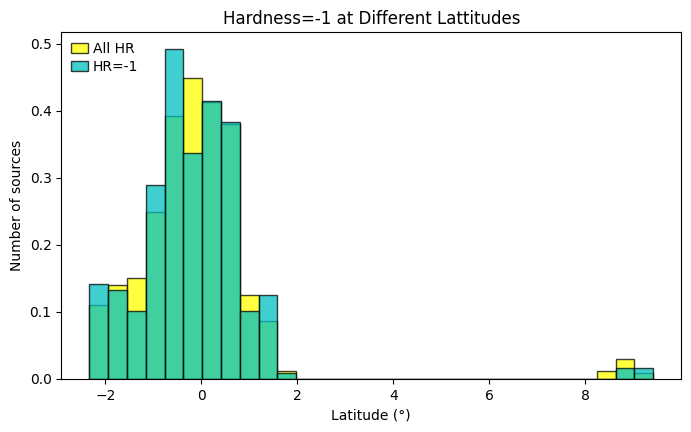

In [65]:
plt.rcParams['xtick.top'] = False
#nbins = np.logspace(np.log10(3e-18),np.log10(np.amax(xmmDR14_sfx2to12[glist_nodupes])),28)
num_bins=30
min_value=np.min(b_1_filt)
max_value=np.max(b_else_filt)
bins = np.linspace(min_value, max_value, num_bins + 1)  # Example for linear bins
plt.figure(figsize=(8.,4.5))
plt.hist(b_else_filt, color='yellow', edgecolor='k', bins=bins, label='All HR', alpha=0.75,density=True)
plt.hist(b_1_filt, color='c', edgecolor='k', bins=bins, label='HR=-1', alpha=0.75,density=True)
plt.xlabel('Latitude (°)')
plt.ylabel('Number of sources')
plt.legend(loc='upper left', labelspacing=0.3, handletextpad=0.35, borderaxespad=0.3, handlelength=1.2, frameon=False, alignment='right')#, markerfirst=False



plt.title('Hardness=-1 at Different Lattitudes')

#plt.ylim(None,1.9e3)
plt.tick_params(axis='x', which='both', direction='out')

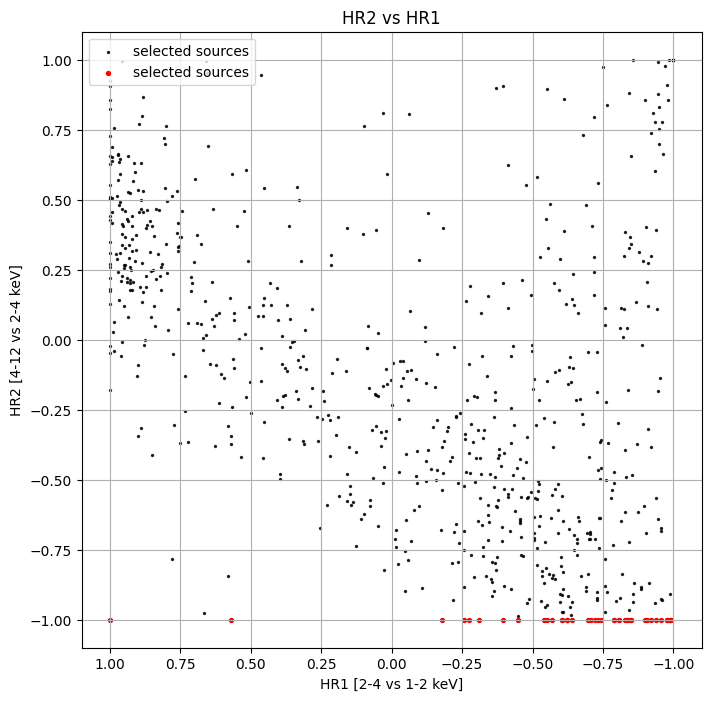

In [508]:
plt.figure(figsize=(8, 8))

# plot just your selected subset
scatter1 = plt.scatter(EPhr3_else_filt, EPhr4_else_filt,
            s=2, marker='o', alpha=0.8, label='selected sources',c='black')
scatter2 = plt.scatter(EPhr3_1_filt, EPhr4_1_filt,
            s=8, marker='o', alpha=1, label='selected sources',c='red')
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:

plt.xlabel('HR1 [2-4 vs 1-2 keV]')
plt.ylabel('HR2 [4-12 vs 2-4 keV]')
plt.title('HR2 vs HR1')
plt.grid(True)
plt.gca().invert_xaxis() 
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()

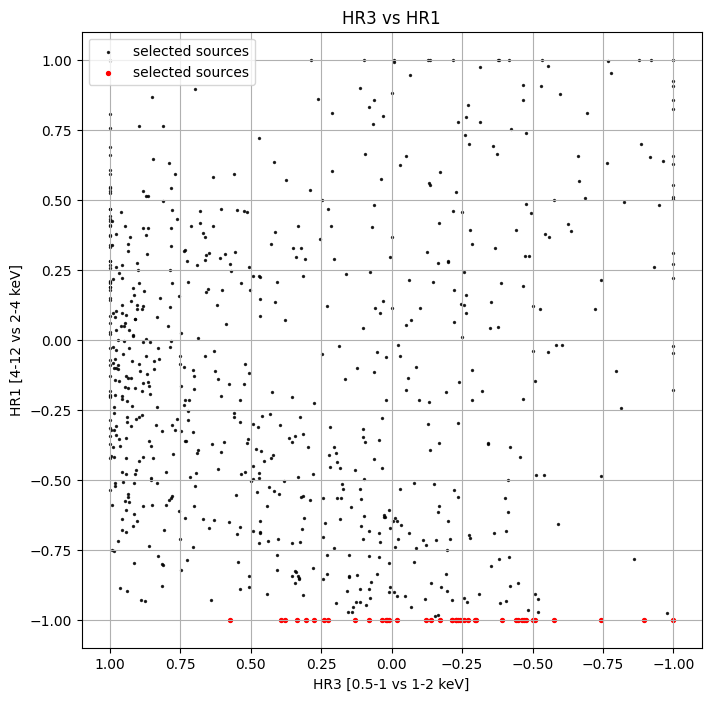

In [509]:
plt.figure(figsize=(8, 8))

# plot just your selected subset
scatter1 = plt.scatter(EPhr2_else_filt, EPhr4_else_filt,
            s=2, marker='o', alpha=0.8, label='selected sources',c='black')
scatter2 = plt.scatter(EPhr2_1_filt, EPhr4_1_filt,
            s=8, marker='o', alpha=1, label='selected sources',c='red')
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:

plt.xlabel('HR3 [0.5-1 vs 1-2 keV]')
plt.ylabel('HR1 [4-12 vs 2-4 keV]')
plt.title('HR3 vs HR1')
plt.grid(True)
plt.gca().invert_xaxis() 
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()

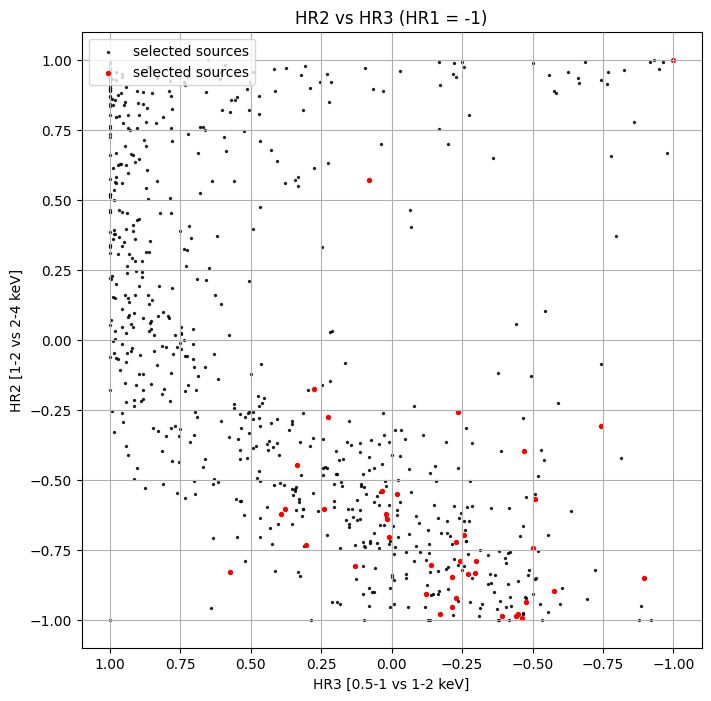

In [510]:
plt.figure(figsize=(8, 8))

# plot just your selected subset
scatter1 = plt.scatter(EPhr2_else_filt, EPhr3_else_filt,
            s=2, marker='o', alpha=0.8, label='selected sources',c='black')
scatter2 = plt.scatter(EPhr2_1_filt, EPhr3_1_filt,
            s=8, marker='o', alpha=1, label='selected sources',c='red')
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:

plt.xlabel('HR3 [0.5-1 vs 1-2 keV]')
plt.ylabel('HR2 [1-2 vs 2-4 keV]')
plt.title('HR2 vs HR3 (HR1 = -1)')
plt.grid(True)
plt.gca().invert_xaxis() 
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()

In [511]:
EPexp4to12 = xmmDR14_EPexp4to12[y]
EPhr3 = xmmDR14_EPhr3[y]
l_filt = xmmDR14_l[y]
b_filt = xmmDR14_b[y]
EPhr4_1 = []
EPhr4_1_filt = []
EPhr3_1 = []
EPhr3_1_filt = []
l_1 = []
b_1 = []
l_1_filt = []
b_1_filt = []
EPhr4_else = []
EPhr3_else = []
l_else = []
b_else = []
EPhr4_else_filt = []
EPhr3_else_filt = []
l_else_filt = []
b_else_filt = []
for i,data in enumerate(y):
    if EPhr3[i] == -1:
        EPhr4_1.append(EPhr4[i])
        EPhr3_1.append(EPhr3[i])
        l_1.append(l_filt[i])
        list_1.append(i)
        b_1.append(b_filt[i])
        if (EPexp4to12[i] >= 20000) & (EPexp4to12[i] <= 40000):
            EPhr4_1_filt.append(EPhr4[i])
            EPhr3_1_filt.append(EPhr3[i])
            
            l_1_filt.append(l_filt[i])
            b_1_filt.append(b_filt[i])
    else:
        EPhr4_else.append(EPhr4[i])
        EPhr3_else.append(EPhr3[i])
        l_else.append(l_filt[i])
        b_else.append(b_filt[i])
        list_else.append(i)
        if (EPexp4to12[i] >= 20000) & (EPexp4to12[i] <= 40000):
            EPhr4_else_filt.append(EPhr4[i])
            EPhr3_else_filt.append(EPhr3[i])
            l_else_filt.append(l_filt[i])
            
            b_else_filt.append(b_filt[i])
EPhr4_1_filt

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

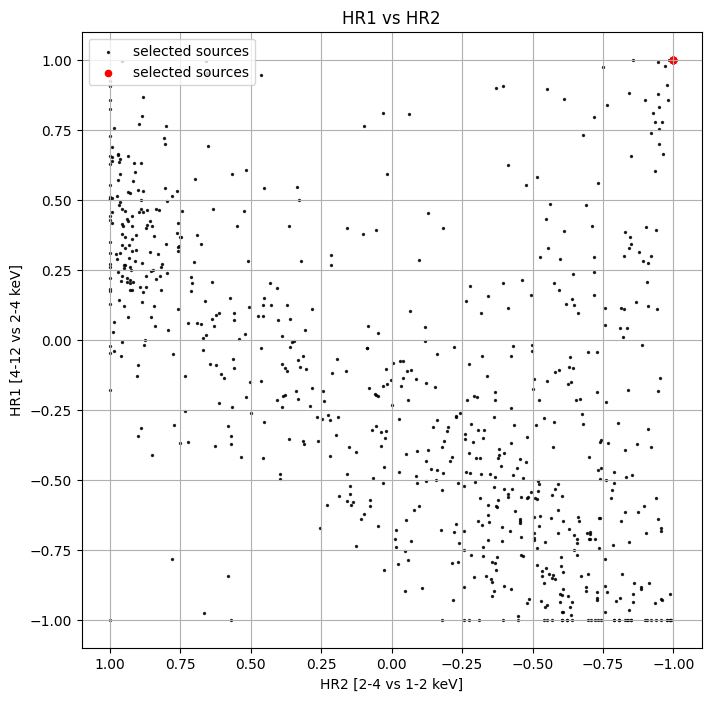

In [512]:
plt.figure(figsize=(8, 8))

# plot just your selected subset
scatter1 = plt.scatter(EPhr3_else_filt, EPhr4_else_filt,
            s=2, marker='o', alpha=0.8, label='selected sources',c='black')
scatter2 = plt.scatter(EPhr3_1_filt, EPhr4_1_filt,
            s=20, marker='o', alpha=1, label='selected sources',c='red')
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:

plt.xlabel('HR2 [2-4 vs 1-2 keV]')
plt.ylabel('HR1 [4-12 vs 2-4 keV]')
plt.title('HR1 vs HR2')
plt.grid(True)
plt.gca().invert_xaxis() 
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()

In [513]:
EPexp4to12 = xmmDR14_EPexp4to12[y]
EPhr2 = xmmDR14_EPhr2[y]
EPhr3 = xmmDR14_EPhr3[y]
l_filt = xmmDR14_l[y]
b_filt = xmmDR14_b[y]
EPhr4_1 = []
EPhr4_1_filt = []
EPhr3_1 = []
EPhr3_1_filt = []
EPhr2_1 = []
EPhr2_1_filt = []
l_1 = []
b_1 = []
l_1_filt = []
b_1_filt = []
EPhr4_else = []
EPhr3_else = []
EPhr2_else = []
l_else = []
b_else = []
EPhr4_else_filt = []
EPhr3_else_filt = []
EPhr2_else_filt = []
l_else_filt = []
b_else_filt = []
for i,data in enumerate(y):
    if EPhr2[i] == -1:
        EPhr4_1.append(EPhr4[i])
        EPhr3_1.append(EPhr3[i])
        EPhr2_1.append(EPhr2[i])
        l_1.append(l_filt[i])
        b_1.append(b_filt[i])
        if (EPexp4to12[i] >= 20000) & (EPexp4to12[i] <= 40000):
            EPhr4_1_filt.append(EPhr4[i])
            EPhr3_1_filt.append(EPhr3[i])
            EPhr2_1_filt.append(EPhr2[i])
            l_1_filt.append(l_filt[i])
            b_1_filt.append(b_filt[i])
    else:
        EPhr4_else.append(EPhr4[i])
        EPhr3_else.append(EPhr3[i])
        EPhr2_else.append(EPhr2[i])
        l_else.append(l_filt[i])
        b_else.append(b_filt[i])
        if (EPexp4to12[i] >= 20000) & (EPexp4to12[i] <= 40000):
            EPhr4_else_filt.append(EPhr4[i])
            EPhr3_else_filt.append(EPhr3[i])
            EPhr2_else_filt.append(EPhr2[i])
            l_else_filt.append(l_filt[i])
            b_else_filt.append(b_filt[i])


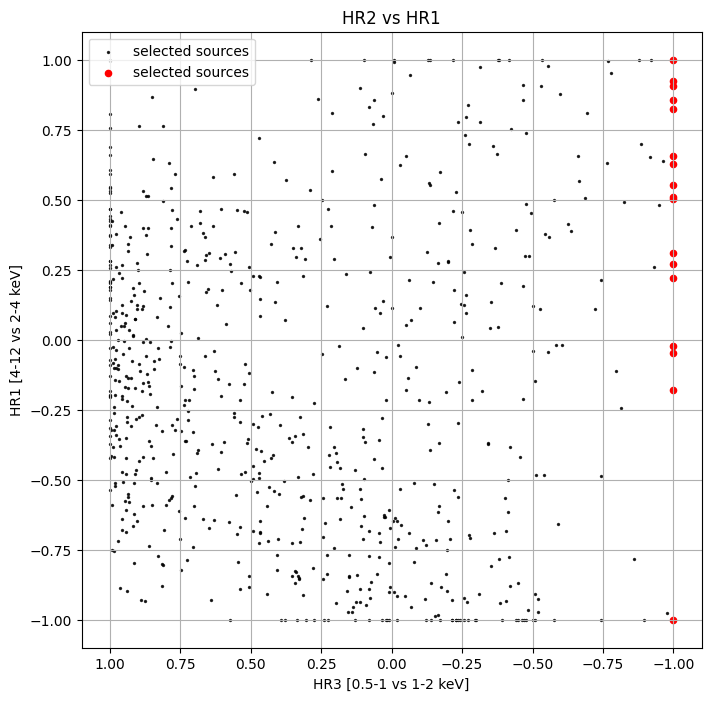

In [89]:
plt.figure(figsize=(8, 8))

# plot just your selected subset
scatter1 = plt.scatter(EPhr2_else_filt, EPhr4_else_filt,
            s=2, marker='o', alpha=0.8, label='selected sources',c='black')
scatter2 = plt.scatter(EPhr2_1_filt, EPhr4_1_filt,
            s=20, marker='o', alpha=1, label='selected sources',c='red')
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:

plt.xlabel('HR3 [0.5-1 vs 1-2 keV]')
plt.ylabel('HR1 [4-12 vs 2-4 keV]')
plt.title('HR2 vs HR1')
plt.grid(True)
plt.gca().invert_xaxis() 
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()

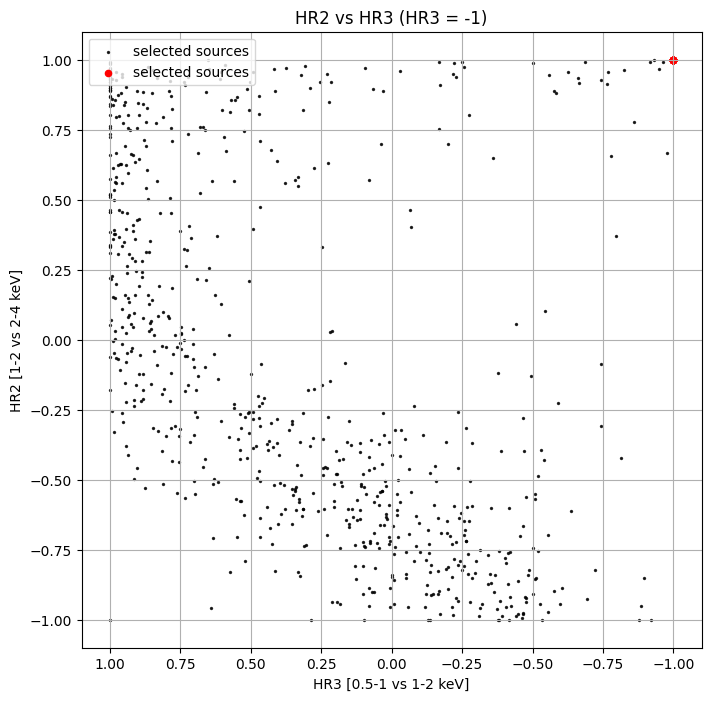

In [90]:
plt.figure(figsize=(8, 8))

# plot just your selected subset
scatter1 = plt.scatter(EPhr2_else_filt, EPhr3_else_filt,
            s=2, marker='o', alpha=0.8, label='selected sources',c='black')
scatter2 = plt.scatter(EPhr2_1_filt, EPhr3_1_filt,
            s=20, marker='o', alpha=1, label='selected sources',c='red')
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:

plt.xlabel('HR3 [0.5-1 vs 1-2 keV]')
plt.ylabel('HR2 [1-2 vs 2-4 keV]')
plt.title('HR2 vs HR3 (HR3 = -1)')
plt.grid(True)
plt.gca().invert_xaxis() 
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()

In [91]:
EPexp4to12 = xmmDR14_EPexp4to12[y]
EPhr2 = xmmDR14_EPhr2[y]
EPhr3 = xmmDR14_EPhr3[y]
EPcts1to2 = xmmDR14_EPcts1to2[y]
EPcts2to4 = xmmDR14_EPcts2to4[y]
EPcts4to12 = xmmDR14_EPcts4to12[y]
l_filt = xmmDR14_l[y]
b_filt = xmmDR14_b[y]
EPhr4_1 = []
EPhr4_1_filt = []
EPhr3_1 = []
EPhr3_1_filt = []
EPhr2_1 = []
EPhr2_1_filt = []
l_1 = []
b_1 = []
l_1_filt = []
b_1_filt = []
EPhr4_else = []
EPhr3_else = []
EPhr2_else = []
l_else = []
b_else = []
EPhr4_else_filt = []
EPhr3_else_filt = []
EPhr2_else_filt = []
l_else_filt = []
b_else_filt = []
for i,data in enumerate(y):
    if EPhr3[i] == -1:
        EPhr4_1.append(EPhr4[i])
        EPhr3_1.append(EPhr3[i])
        EPhr2_1.append(EPhr2[i])
        l_1.append(l_filt[i])
        b_1.append(b_filt[i])
        if (EPexp4to12[i] >= 20000) & (EPexp4to12[i] <= 40000):
            EPhr4_1_filt.append(EPhr4[i])
            EPhr3_1_filt.append(EPhr3[i])
            EPhr2_1_filt.append(EPhr2[i])
            l_1_filt.append(l_filt[i])
            b_1_filt.append(b_filt[i])
    else:
        EPhr4_else.append(EPhr4[i])
        EPhr3_else.append(EPhr3[i])
        EPhr2_else.append(EPhr2[i])
        l_else.append(l_filt[i])
        b_else.append(b_filt[i])
        if (EPexp4to12[i] >= 20000) & (EPexp4to12[i] <= 40000):
            EPhr4_else_filt.append(EPhr4[i])
            EPhr3_else_filt.append(EPhr3[i])
            EPhr2_else_filt.append(EPhr2[i])
            l_else_filt.append(l_filt[i])
            b_else_filt.append(b_filt[i])


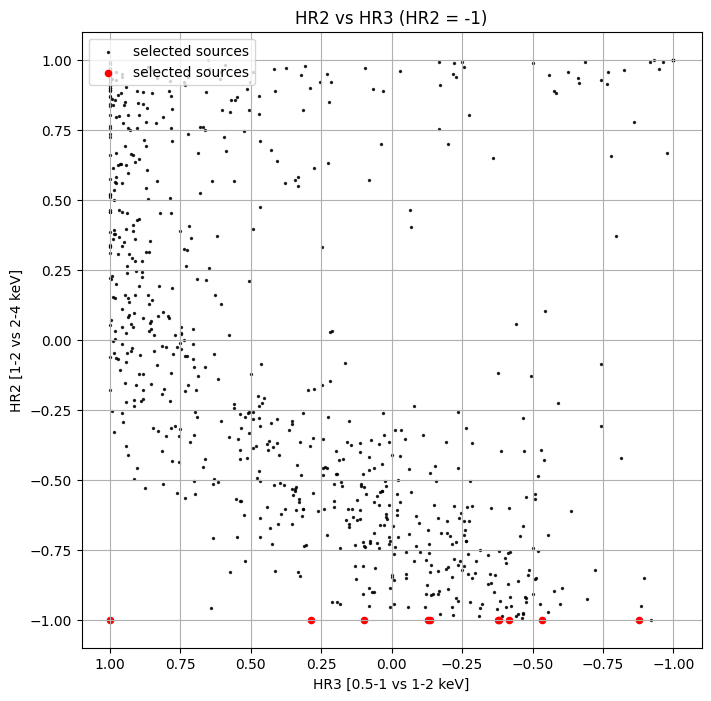

In [92]:
plt.figure(figsize=(8, 8))

# plot just your selected subset
scatter1 = plt.scatter(EPhr2_else_filt, EPhr3_else_filt,
            s=2, marker='o', alpha=0.8, label='selected sources',c='black')
scatter2 = plt.scatter(EPhr2_1_filt, EPhr3_1_filt,
            s=20, marker='o', alpha=1, label='selected sources',c='red')
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:

plt.xlabel('HR3 [0.5-1 vs 1-2 keV]')
plt.ylabel('HR2 [1-2 vs 2-4 keV]')
plt.title('HR2 vs HR3 (HR2 = -1)')
plt.grid(True)
plt.gca().invert_xaxis() 
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()

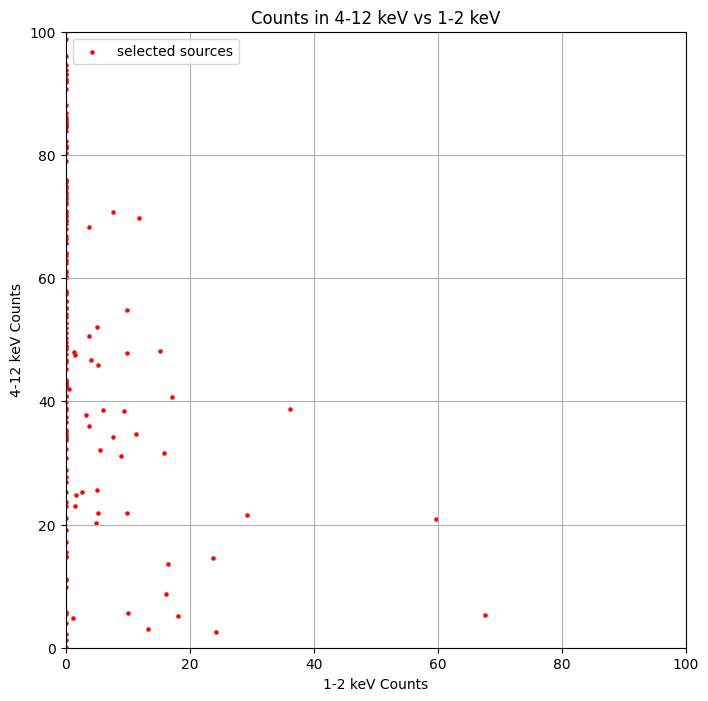

[5.99392176e+00 3.52023048e+01 3.49216056e+00 4.37819624e+00
 1.26805902e+00 8.67051697e+00 2.47137928e+01 1.64330349e+01
 6.56261635e+00 4.72269869e+00 1.09366142e+02 3.70591903e+00
 3.83787041e+01 1.73766575e+01 2.95571327e+01 6.98878479e+00
 2.10190067e+01 1.30045547e+01 5.97497749e+00 1.65537465e+00
 5.52211809e+00 2.12016773e+01 1.41446381e+01 2.38131485e+01
 1.05158100e+01 8.00743389e+00 2.14817619e+01 5.34117842e+00
 2.36618366e+01 2.90153933e+00 1.26956534e+00 5.76953316e+00
 5.56978912e+01 5.49154949e+00 8.94244289e+00 1.22511797e+01
 2.12460804e+00 1.46778774e+00 1.29643097e+01 9.97701836e+00
 2.26926804e+01 1.14701595e+01 1.09937382e+00 1.09833038e+00
 1.05461884e+01 2.09253807e+01 6.65564585e+00 1.05828393e+00
 2.06223640e+01 5.06512737e+00 3.34285965e+01 1.54205017e+01
 4.73785496e+00 2.90733356e+01 5.81780052e+00 9.90228367e+00
 1.90203342e+01 4.97894239e+00 3.38852191e+00 5.55131578e+00
 2.18080921e+01 4.30099308e-01 1.98980579e+01 5.07204514e+01
 1.47649593e+01 8.580736

In [93]:
EPcts1to2 = xmmDR14_EPcts1to2[y]
EPcts2to4 = xmmDR14_EPcts2to4[y]
EPcts4to12 = xmmDR14_EPcts4to12[y]
EPcts1to2_1 = EPcts1to2[list_1]
EPcts1to2_else = EPcts1to2[list_else]
EPcts4to12_1 = EPcts4to12[list_1]
EPcts4to12_else = EPcts4to12[list_else]
EPcts2to4_1 = EPcts2to4[list_1]
EPcts2to4_else = EPcts2to4[list_else]

plt.figure(figsize=(8, 8))

# plot just your selected subset

scatter1 = plt.scatter(EPcts1to2_1, EPcts4to12_1,
            s=5, marker='o', alpha=1, label='selected sources',c='red')
plt.legend(loc='upper left')
# zoom into your 1°×2° window—adjust these as needed
# e.g. if you want RA from 179.5 to 180.5 and Dec from -1 to +1:

plt.xlabel('1-2 keV Counts')
plt.ylabel('4-12 keV Counts')
plt.xlim(0,100)
plt.ylim(0,100)

plt.title('Counts in 4-12 keV vs 1-2 keV')
plt.grid(True)
#plt.gca().invert_xaxis()    # optional: if you want RA increasing to the left
#plt.tight_layout()
plt.show()
print(EPcts2to4_1)

In [67]:
from astropy.io import fits
from astropy.wcs import WCS

# Load FITS file
with fits.open('nH_analysis/column_density_inner20deg_filled.fits') as hdul:
    data_nH = hdul[0].data
    header_nH = hdul[0].header
    wcs_nH = WCS(header_nH)

with fits.open('extinction_analysis/VVVextmap_mef_ciao_ready.fits') as hdul:
    data_ext = hdul[0].data
    header_ext = hdul[0].header
    wcs_ext = WCS(header_ext)

In [529]:
count=0
for outer_key, inner_dict in final_test.items():
        for inner_key, sources in inner_dict.items():
                count=count+1
                
print(count)

170


IndexError: index 649 is out of bounds for axis 0 with size 636

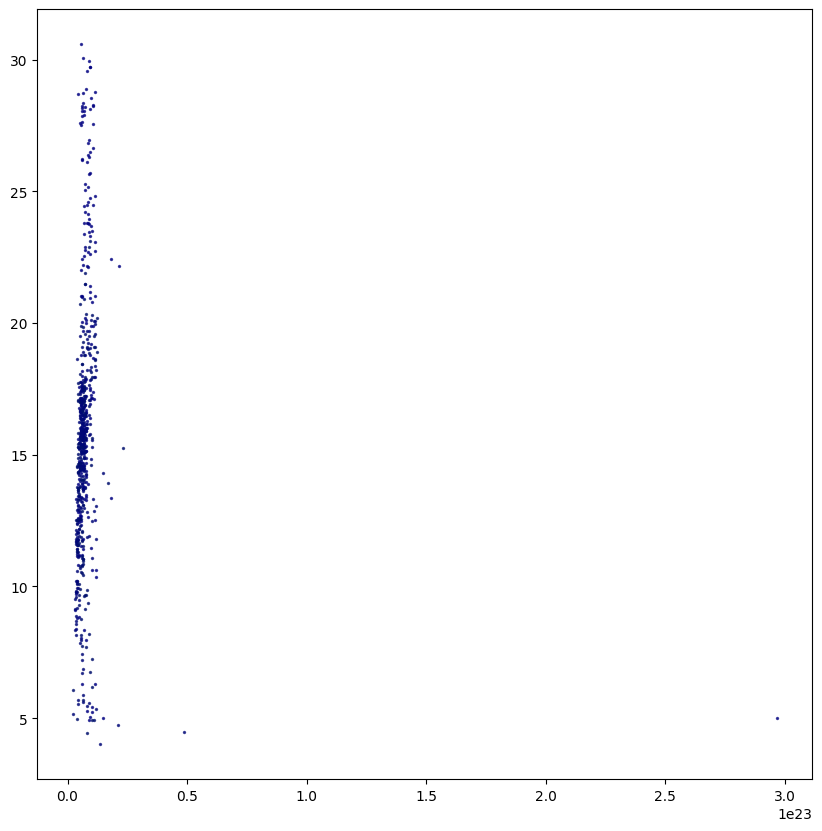

In [68]:
id_list = xmmDR14_id[y]

# Generate unique colors using a colormap
cmap = plt.get_cmap('gist_ncar')  # Good for many distinguishable colors
colors = [cmap(i / count) for i in range(count)]
num = 0
#colors = plt.cm.tab20(np.linspace(0, 1, count))
plt.figure(figsize=(10, 10))
for i, (group_key, groups) in enumerate(final_test.items()):
    for j, (inner_key, sources) in enumerate(groups.items()):
        
        for source in sources['sources']:
            row_index = np.where(id_list == source['src_id'])[0]
            row_index=row_index[0]
            l1 = l_filt[row_index]
            b1 = b_filt[row_index]  
            x_pix1, y_pix1 = wcs_nH.wcs_world2pix(l1, b1, 0)   
            x_pix1 = int(round(float(x_pix1)))
            y_pix1 = int(round(float(y_pix1)))
            nh = data_nH[y_pix1, x_pix1]
            x_pix1, y_pix1 = wcs_ext.wcs_world2pix(l1, b1, 0)
            x_pix1 = int(round(float(x_pix1)))
            y_pix1 = int(round(float(y_pix1)))
            ext = data_ext[y_pix1, x_pix1]
            plt.scatter(nh, ext, color=colors[num], alpha=0.7, s=2, label=str(inner_key) if i == 0 else "")
        num = num + 1

plt.xlabel('nH')
plt.ylabel('Extinction')
plt.xscale('log')
plt.title('nH vs. Extinction by Group')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

IndexError: index 649 is out of bounds for axis 0 with size 636

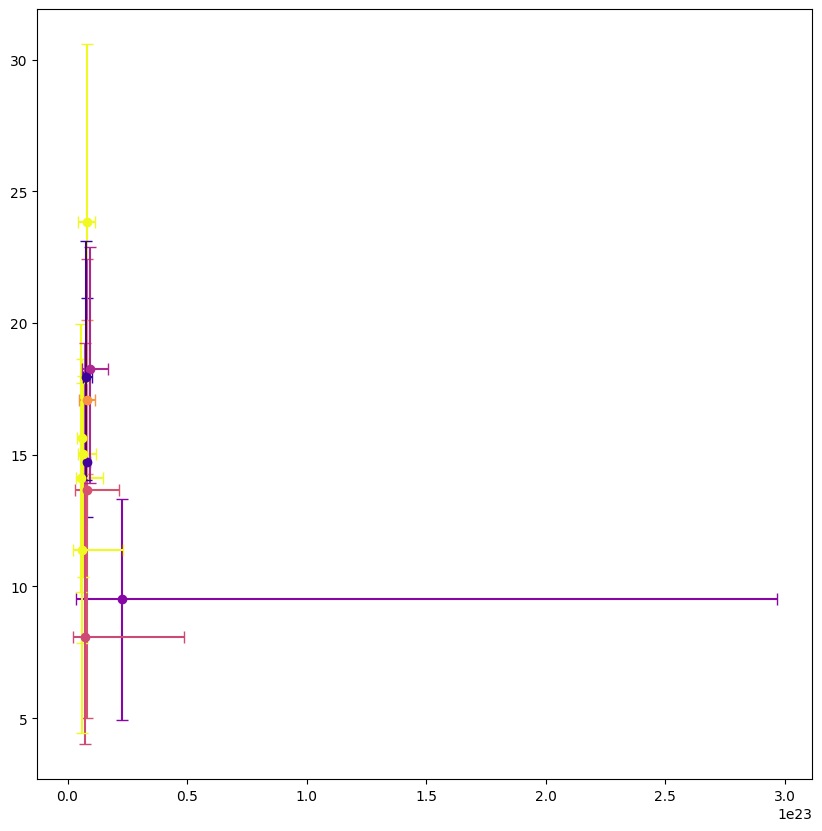

In [69]:
id_list = xmmDR14_id[y]

# Generate unique colors using a colormap
#cmap = plt.get_cmap('gist_ncar')  # Good for many distinguishable colors
#colors = [cmap(i / count) for i in range(count)]
num = 0
num_sources = []
hr_mean = []
for i, (group_key, groups) in enumerate(final_test.items()):
    for j, (inner_key, sources) in enumerate(groups.items()):
        num_sources.append(len(sources['sources']))
        hr_list = []
        for source in sources['sources']:
            hr_list.append(source['hardness'])
        hr_mean.append(np.mean(hr_list))

# Normalize color values for the colormap
norm = Normalize(vmin=np.min(1), vmax=np.max(60))
cmap = cm.plasma  # Or any other colormap
colors = cmap(norm(num_sources))
#colors = plt.cm.tab20(np.linspace(0, 1, count))
fig, ax = plt.subplots(figsize=(10, 10))
for i, (group_key, groups) in enumerate(final_test.items()):
    for j, (inner_key, sources) in enumerate(groups.items()):
        nh_list = []
        ext_list = []
        nh_error = [[],[]]
        ext_error = [[],[]]
        for source in sources['sources']:
            row_index = np.where(id_list == source['src_id'])[0]
            row_index=row_index[0]
            l1 = l_filt[row_index]
            b1 = b_filt[row_index]  
            x_pix1, y_pix1 = wcs_nH.wcs_world2pix(l1, b1, 0)   
            x_pix1 = int(round(float(x_pix1)))
            y_pix1 = int(round(float(y_pix1)))
            nh_list.append(data_nH[y_pix1, x_pix1])
            x_pix1, y_pix1 = wcs_ext.wcs_world2pix(l1, b1, 0)
            x_pix1 = int(round(float(x_pix1)))
            y_pix1 = int(round(float(y_pix1)))
            ext_list.append(data_ext[y_pix1, x_pix1])
        cmap = cm.plasma
        color_mapped_data = cmap(num_sources)
        nh_error[0].append(np.mean(nh_list)-np.min(nh_list))
        nh_error[1].append(np.max(nh_list)-np.mean(nh_list))
        ext_error[0].append(np.mean(ext_list)-np.min(ext_list))
        ext_error[1].append(np.max(ext_list)-np.mean(ext_list))
        plt.errorbar(np.mean(nh_list), np.mean(ext_list), xerr=nh_error, yerr=ext_error, fmt='o', capsize=4, color=colors[num], ecolor=colors[num])
        num = num + 1


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Number of Sources')
#plt.xlim(1e21,1e22)
#plt.ylim(8,20)
#plt.xlim(1e22,1e24)
#plt.ylim(20,34)
plt.xlim(1e21,1e24)
plt.ylim(7,33)
plt.xlabel('nH')
plt.ylabel('Extinction')
plt.xscale('log')
plt.title('nH vs. Extinction by Group')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

In [ ]:
id_list = xmmDR14_id[y]
import numpy as np
# Generate unique colors using a colormap
cmap = plt.get_cmap('gist_ncar')  # Good for many distinguishable colors
colors = [cmap(i / count) for i in range(count)]
num = 0
#colors = plt.cm.tab20(np.linspace(0, 1, count))
plt.figure(figsize=(10, 10))
for i, (group_key, groups) in enumerate(final_test.items()):
    for j, (inner_key, sources) in enumerate(groups.items()):
        nh_list = []
        ext_list = []
        nh_error = [[],[]]
        ext_error = [[],[]]
        for source in sources['sources']:
            row_index = np.where(id_list == source['src_id'])[0]
            row_index=row_index[0]
            l1 = l_filt[row_index]
            b1 = b_filt[row_index]  
            x_pix1, y_pix1 = wcs_nH.wcs_world2pix(l1, b1, 0)   
            x_pix1 = int(round(float(x_pix1)))
            y_pix1 = int(round(float(y_pix1)))
            nh_list.append(data_nH[y_pix1, x_pix1])
            x_pix1, y_pix1 = wcs_ext.wcs_world2pix(l1, b1, 0)
            x_pix1 = int(round(float(x_pix1)))
            y_pix1 = int(round(float(y_pix1)))
            ext_list.append(data_ext[y_pix1, x_pix1])
        
        nh_list = np.array(nh_list, dtype=np.float64)
        print(np.std(nh_list))
        nh_error[0].append(np.mean(nh_list)-np.std(nh_list))
        nh_error[1].append(np.std(nh_list)+np.mean(nh_list))
        ext_error[0].append(np.mean(ext_list)-np.std(ext_list))
        ext_error[1].append(np.std(ext_list)+np.mean(ext_list))
        plt.errorbar(np.mean(nh_list), np.mean(ext_list), xerr=nh_error, yerr=ext_error, fmt='o', capsize=4, ecolor='gray')
        num = num + 1

plt.xlabel('nH')
plt.ylabel('Extinction')
plt.xscale('log')
plt.title('nH vs. Extinction by Group')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

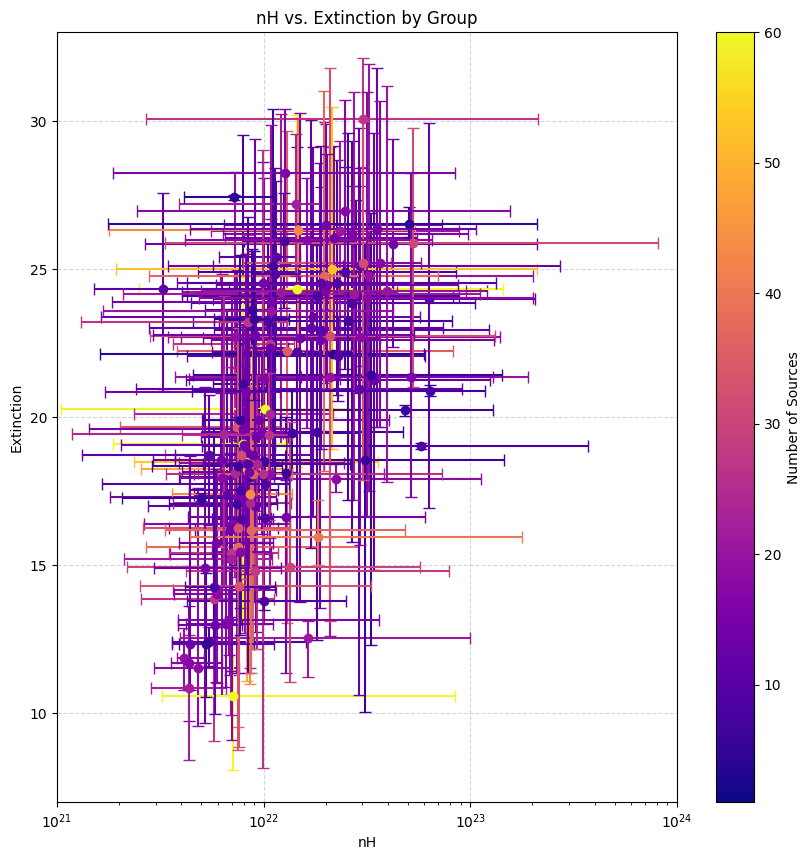

In [606]:
id_list = xmmDR14_id[y]

# Generate unique colors using a colormap
#cmap = plt.get_cmap('gist_ncar')  # Good for many distinguishable colors
#colors = [cmap(i / count) for i in range(count)]
num = 0
num_sources = []
hr_mean = []
mean_nh = []
for outer_key, inner_dict in final_test.items():
    for inner_key, sources in inner_dict.items():
        num_sources.append(len(sources['sources']))
        if len(sources['sources'])>1 and len(sources)>1:
            hr_mean.append(sources['meta'][0]['mean_hardness'])
            mean_nh.append(sources['meta'][0]['mean_nH'])
        else:
            hr_mean.append(sources['sources'][0]['hardness'])

# Normalize color values for the colormap
norm = Normalize(vmin=np.min(1), vmax=np.max(60))
cmap = cm.plasma  # Or any other colormap
colors = cmap(norm(num_sources))
#colors = plt.cm.tab20(np.linspace(0, 1, count))
fig, ax = plt.subplots(figsize=(10, 10))
for i, (group_key, groups) in enumerate(final_test.items()):
    for j, (inner_key, sources) in enumerate(groups.items()):
        nh_list = []
        ext_list = []
        nh_error = [[],[]]
        ext_error = [[],[]]
        for source in sources['sources']:
            nh_list.append(source['nh'])
            ext_list.append(source['extinction'])
        cmap = cm.plasma
        color_mapped_data = cmap(num_sources)
        if len(sources['sources'])>1 and len(sources)>1:
            
            nh_error[0].append(sources['meta'][0]['mean_nH']-np.min(nh_list))
            
            nh_error[1].append(np.max(nh_list)-sources['meta'][0]['mean_nH'])
            
            ext_error[0].append(sources['meta'][0]['mean_extinction']-np.min(ext_list))
            ext_error[1].append(np.max(ext_list)-sources['meta'][0]['mean_extinction'])
        else:
            nh_error[0].append(sources['sources'][0]['nh']-np.min(nh_list))
            nh_error[1].append(np.max(nh_list)-sources['sources'][0]['nh'])
            ext_error[0].append(sources['sources'][0]['extinction']-np.min(ext_list))
            ext_error[1].append(np.max(ext_list)-sources['sources'][0]['extinction'])
        plt.errorbar(np.mean(nh_list), np.mean(ext_list), xerr=nh_error, yerr=ext_error, fmt='o', capsize=4, color=colors[num], ecolor=colors[num])
        num = num + 1


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Number of Sources')
#plt.xlim(1e21,1e22)
#plt.ylim(8,20)
#plt.xlim(1e22,1e24)
#plt.ylim(20,34)
plt.xlim(1e21,1e24)
plt.ylim(7,33)
plt.xlabel('nH')
plt.ylabel('Extinction')
plt.xscale('log')
plt.title('nH vs. Extinction by Group')
plt.grid(True, ls='--', alpha=0.5)
plt.show()